# Import Library

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load Data

In [2]:
! gdown --id 1lDDUxarU9krRMWCLyMdDueGe5h8WF-Q2

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1lDDUxarU9krRMWCLyMdDueGe5h8WF-Q2
From (redirected): https://drive.google.com/uc?id=1lDDUxarU9krRMWCLyMdDueGe5h8WF-Q2&confirm=t&uuid=5aa0a313-be6c-4743-9b92-a107f9c2892b
To: /content/FP Rakamin.csv
100% 240M/240M [00:02<00:00, 83.0MB/s]


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/FP Rakamin.csv')
df.head(10)

<ipython-input-3-ffc8a6cc5663>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/FP Rakamin.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08

# Eksploring Data

## Check Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Statistical Summary

In [5]:
# Melihat rangkuman statistik dari kolom numerik
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Value Count

In [6]:
# Mengecek jumlah masing-masing value pada kolom kategorikal
numeric_columns = df.select_dtypes(include='object').columns

for column in numeric_columns:
    print(f"Value counts for {column}:\n{df[column].value_counts()}\n")

Value counts for term:
 36 months    337953
 60 months    128332
Name: term, dtype: int64

Value counts for grade:
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Value counts for sub_grade:
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Value counts for issue_d:
Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
Aug-14    18814
Jun-14    17179
Mar-14    16513
Jan-14    15628
Feb-14    15269
Dec-13    15020
Nov-13    14676
Oct-13    14114
Sep-13    12987
Aug-13    12674
Jul-13    11910
Jun-13    10899
Sep-14    10606
May-13    10350
Dec-14    10307
Apr-13     9419
Mar-13     8273
Feb-13     7561
Jan-13     6872
Nov-12     6382
Oct-12     6263
Sep-12     6087
Dec-12     6066
Aug-12     5419
Jul-12     4627
Jun-12     3817
May-12     3400
Apr-12     3230
Mar-12     2914
Jan-12     2602
Feb-12     2560
Dec-11     2267
Nov-11     2232
Oct-11     2118
Sep-11     2067
Aug-11     1934
Jul-11     1875
Jun-11     1835
May-11     1704
Apr-11     1563
Mar-11     1448
Jan-11     1380
Dec-10     1335
Feb-11     1298
Oct-10     1232
Nov-10     1224
Jul-10     1204
Sep-10     1189
Aug-10     1175
Jun-10     1105
May-10      989
Apr-10      912
Mar-10      828
Feb-10      682
Jan-10      662
Nov-09      66

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Value counts for next_pymnt_d:
Feb-16    208393
Jan-16     27922
Mar-11       107
Apr-11       101
Feb-11        91
Jan-11        79
May-11        77
Dec-10        71
Jun-11        66
Sep-11        63
Aug-11        57
Nov-10        55
Aug-10        54
Dec-09        53
Oct-09        53
Jul-11        53
Sep-10        53
Nov-09        52
Dec-08        51
Apr-12        49
Jul-10        49
Mar-10        49
May-12        48
Oct-10        48
Mar-12        48
Oct-11        47
Oct-12        47
Jan-12        45
Dec-11        43
Apr-13        43
Feb-13        42
May-13        42
Jun-12        40
Mar-13        40
Nov-11        36
Dec-12        36
Nov-12        35
Jul-12        34
Oct-13        34
Sep-12        33
Aug-09        32
Jun-13        32
Apr-10        31
Aug-12        31
Jan-13        29
May-10        29
Feb-10        29
Jun-10        27
Feb-12        26
Nov-13        26
Dec-13        25
May-09        24
Aug-13        22
Sep-09        21
Jan-10        20
Jun-09        20
Jul-13        19


# Defining Target Column

Kolom yang akan dijadikan target adalah 'loan_status' karena dapat menunjukkan performa kredit dari debitur, dengan kata lain dapat menunjukkan kualitas kredit, apakah bisa disebut baik atau buruk. Berikut adalah penjelasan value-value dari kolom 'loan_status':
1. Current:Peminjam saat ini masih membayar angsuran sesuai jadwal dan belum mengalami keterlambatan pembayaran
2. Fully Paid: Peminjam telah melunasi pinjaman sepenuhnya dengan pembayaran yang telah dijadwalkan.
3. Charged Off: Peminjam dianggap tidak mampu melunasi pinjaman, dan pinjaman dianggap sebagai kerugian oleh pemberi pinjaman.
4. Late (31-120 days): Peminjam memiliki keterlambatan pembayaran selama 31-120 hari. Ini menunjukkan bahwa pembayaran telah melewati batas jatuh tempo.
5. In Grace Period: Peminjam mungkin memiliki batas waktu tambahan untuk membayar (grace period), meskipun pembayaran telah lewat batas jatuh tempo.
6. Does not meet the credit policy. Status: Fully Paid: Meskipun peminjam tidak memenuhi kebijakan kredit tertentu, mereka telah melunasi pinjaman sepenuhnya.
7. Late (16-30 days): Peminjam memiliki keterlambatan pembayaran selama 16-30 hari.
8. Default: Default menunjukkan bahwa peminjam gagal memenuhi kewajiban pembayaran, dan pinjaman dianggap macet.
9. Does not meet the credit policy. Status: Charged Off: Meskipun peminjam tidak memenuhi kebijakan kredit tertentu, pinjaman dianggap sebagai kerugian oleh pemberi pinjaman.

Diasumsikan bahwa pinjaman yang baik adalah pinjaman yang telah atau sedang dibayar, sedangkan pinjaman yang buruk adalah pinjaman gagal bayar atau telat bayar. Oleh karena itu, value yang dilabeli "good" adalah sebagai berikut:
- Current
- Fully Paid
- In Grace Period
- Does not meet the credit policy. Status: Fully Paid

Sedangkan sisanya akan dilabeli "bad"

In [7]:
good_loan = ['Current',
              'Fully Paid',
              'In Grace Period',
              'Does not meet the credit policy. Status:Fully Paid']
df['loan_status'] = np.where(df['loan_status'].isin(good_loan), 'good', 'bad')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,good,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,bad,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,good,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,good,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,good,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Selection

Feature Selection bertujuan untuk memilih kolom yang paling relevan atau signifikan untuk membangun model. Tujuan utama dari feature selection adalah meningkatkan kinerja model dengan mengurangi dimensi data, mengurangi kompleksitas model, meningkatkan interpretabilitas, dan mengurangi risiko overfitting. Beberapa cara yang dilakukan antara lain:
- Menghapus kolom yang terdiri dari banyak missing value
- Menghapus kolom yang terdiri dari banyak value unik
- Menghapus kolom yang tidak diperlukan

## Handle Missing Value

In [8]:
# Mengecek jumlah missing value pada semua kolom
null_value = df.isnull().sum()
null_value

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [9]:
# Kolom dengan jumlah jumlah missing value <50% diatasi dengan cara mengisikan nilai modus masing-masing kolom pada value yang kosong
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode().iloc[0])
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode().iloc[0])
df['title'] = df['title'].fillna(df['title'].mode().iloc[0])
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df['delinq_2yrs'].mode().iloc[0])
df['earliest_cr_line'] = df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode().iloc[0])
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(df['inq_last_6mths'].mode().iloc[0])
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].mode().iloc[0])
df['pub_rec'] = df['pub_rec'].fillna(df['pub_rec'].mode().iloc[0])
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mode().iloc[0])
df['total_acc'] = df['total_acc'].fillna(df['total_acc'].mode().iloc[0])
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode().iloc[0])
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode().iloc[0])
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mode().iloc[0])
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(df['acc_now_delinq'].mode().iloc[0])
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df['tot_coll_amt'].mode().iloc[0])
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].mode().iloc[0])
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mode().iloc[0])

In [10]:
# Kolom dengan jumlah jumlah missing value >50% diatasi dengan cara menghapus kolom-kolom tersebut
df.drop(['desc',
         'mths_since_last_delinq',
         'mths_since_last_record',
         'next_pymnt_d',
         'mths_since_last_major_derog',
         'annual_inc_joint',
         'dti_joint',
         'verification_status_joint',
         'open_acc_6m',
         'open_il_6m',
         'open_il_12m',
         'open_il_24m',
         'mths_since_rcnt_il',
         'total_bal_il',
         'il_util',
         'open_rv_12m',
         'open_rv_24m',
         'max_bal_bc',
         'all_util',
         'inq_fi',
         'total_cu_tl',
         'inq_last_12m'], axis=1, inplace=True)

In [11]:
# Mengecek ulang jumlah missing value pada semua kolom
null_value = df.isnull().sum()
null_value

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    4
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

## Handle Unique Column

In [12]:
# Mengecek jumlah nilai unik pada semua kolom
unique_value = df.nunique()
unique_value

Unnamed: 0                    466285
id                            466285
member_id                     466285
loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
term                               2
int_rate                         506
installment                    55622
grade                              7
sub_grade                         35
emp_title                     205475
emp_length                        11
home_ownership                     6
annual_inc                     31901
verification_status                3
issue_d                           91
loan_status                        2
pymnt_plan                         2
url                           466285
purpose                           14
title                          63099
zip_code                         888
addr_state                        50
dti                             3997
delinq_2yrs                       24
earliest_cr_line                 664
i

In [13]:
# Menghapus kolom yang jumlah nilai uniknya 1 atau terlalu banyak
df.drop(['Unnamed: 0',
         'id',
         'member_id',
         'funded_amnt',
         'funded_amnt_inv',
         'dti',
         'total_rec_late_fee',
         'tot_coll_amt',
         'installment',
         'url',
         'title',
         'revol_bal',
         'emp_title',
         'annual_inc',
         'out_prncp',
         'out_prncp_inv',
         'total_pymnt',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_rec_int',
         'recoveries',
         'collection_recovery_fee',
         'last_pymnt_amnt',
         'tot_cur_bal',
         'policy_code',
         'application_type',
         'total_rev_hi_lim'], axis=1, inplace=True)

In [14]:
# Mengecek ulang jumlah nilai unik pada semua kolom
unique_value = df.nunique()
unique_value

loan_amnt                     1352
term                             2
int_rate                       506
grade                            7
sub_grade                       35
emp_length                      11
home_ownership                   6
verification_status              3
issue_d                         91
loan_status                      2
pymnt_plan                       2
purpose                         14
zip_code                       888
addr_state                      50
delinq_2yrs                     24
earliest_cr_line               664
inq_last_6mths                  28
open_acc                        62
pub_rec                         26
revol_util                    1269
total_acc                      112
initial_list_status              2
last_pymnt_d                    98
last_credit_pull_d             103
collections_12_mths_ex_med       9
acc_now_delinq                   6
dtype: int64

## Useless Column

Kolom yang tidak diperlukan untuk analisis lebih lanjut sebaiknya dihapus agar mendapat performa model yang baik.

In [15]:
df.drop(['sub_grade',
         'zip_code',
         'earliest_cr_line'], axis=1, inplace=True)

# Change Data Type

Pada tahap ini, data diubah menjadi format yang lebih sesuai untuk analisis lebih lanjut.
- Tipe kolom 'term' dan 'emp_length' diubah menjadi numeric dengan penyesuaian format tertentu
- Tipe kolom 'issue_d', 'last_pymnt_d', dan 'last_credit_pull_d' diubah menjadi datetime

Kolom 'term'

In [16]:
df['term_months'] = df['term'].str.replace(' months', '')
df['term_months'] = df['term_months'].astype(int)
df.drop('term', axis=1, inplace=True)

Kolom 'emp_length'

In [17]:
df['emp_length_years'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_years'] = df['emp_length_years'].str.replace('< 1 year', str(0))
df['emp_length_years'] = df['emp_length_years'].str.replace(' years', '')
df['emp_length_years'] = df['emp_length_years'].str.replace(' year', '')
df['emp_length_years'] = df['emp_length_years'].astype(int)
df.drop('emp_length', axis=1, inplace=True)

<ipython-input-17-4aa3fcf75967>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_years'] = df['emp_length'].str.replace('\+ years', '')


Kolom 'issue_d', 'earliest_cr_line', 'last_pymnt_d', dan 'last_credit_pull_d'

In [18]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [19]:
df.head()

,loan_amnt,int_rate,grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,term_months,emp_length_years
0,5000,10.65,B,RENT,Verified,2011-12-01,good,n,credit_card,AZ,0.0,1.0,3.0,0.0,83.7,9.0,f,2015-01-01,2016-01-01,0.0,0.0,36,10
1,2500,15.27,C,RENT,Source Verified,2011-12-01,bad,n,car,GA,0.0,5.0,3.0,0.0,9.4,4.0,f,2013-04-01,2013-09-01,0.0,0.0,60,0
2,2400,15.96,C,RENT,Not Verified,2011-12-01,good,n,small_business,IL,0.0,2.0,2.0,0.0,98.5,10.0,f,2014-06-01,2016-01-01,0.0,0.0,36,10
3,10000,13.49,C,RENT,Source Verified,2011-12-01,good,n,other,CA,0.0,1.0,10.0,0.0,21.0,37.0,f,2015-01-01,2015-01-01,0.0,0.0,36,10
4,3000,12.69,B,RENT,Source Verified,2011-12-01,good,n,other,OR,0.0,0.0,15.0,0.0,53.9,38.0,f,2016-01-01,2016-01-01,0.0,0.0,60,1


# Handle Duplicated Data

In [20]:
duplicated_data = df.duplicated().sum()
duplicated_data

0

Tidak ada data duplikat

# Handle Outliers

In [21]:
# Menghapus outlier menggunakan Z-score dengan Threshold 3
def remove_outliers_zscore_loop(df, threshold=3):
    outliers = []
    for col in df.select_dtypes(include='number').columns:
        z_scores = np.abs((df[col] - df[col].mean()) /df[col].std())
        outliers.append(z_scores <= threshold)
    outliers = np.all(outliers, axis=0)
    no_outliers = df[outliers]
    return no_outliers

df = remove_outliers_zscore_loop(df)

# Univariate Analysis

## Categorical Columns

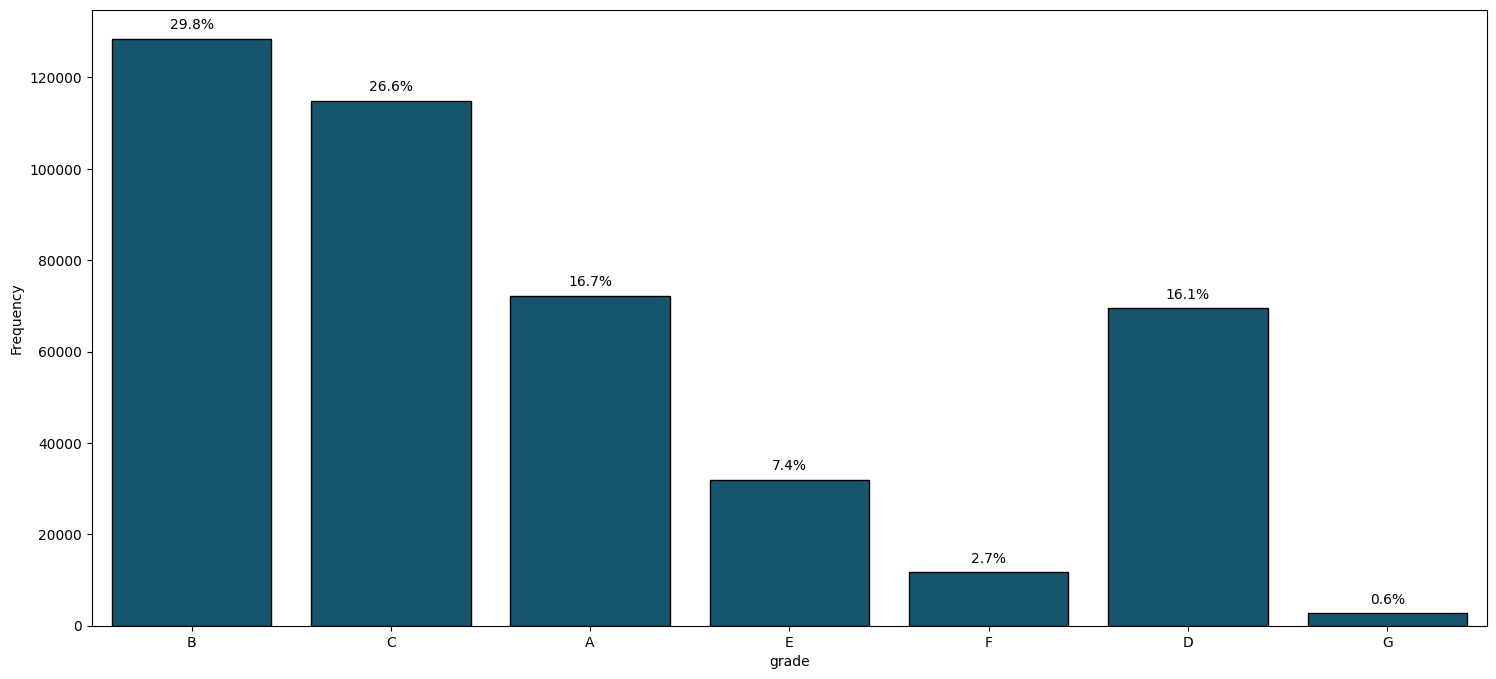

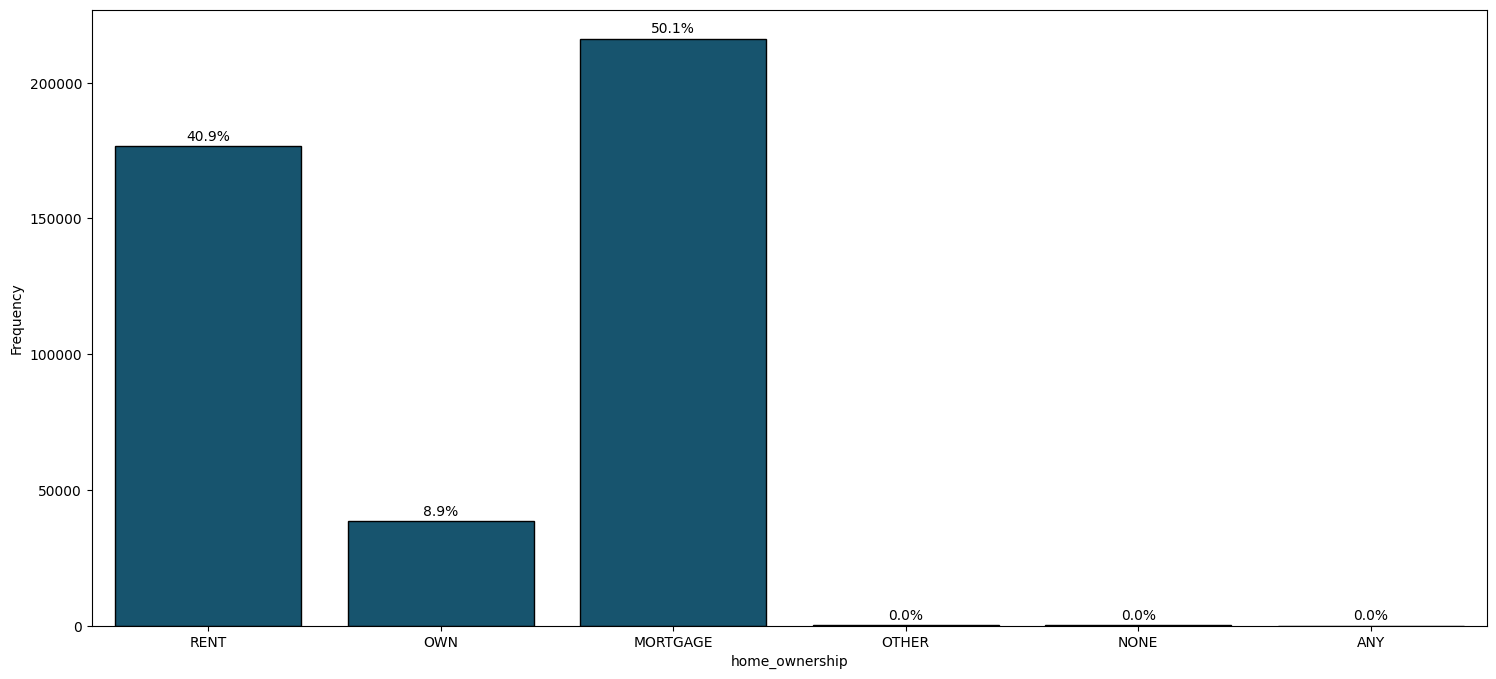

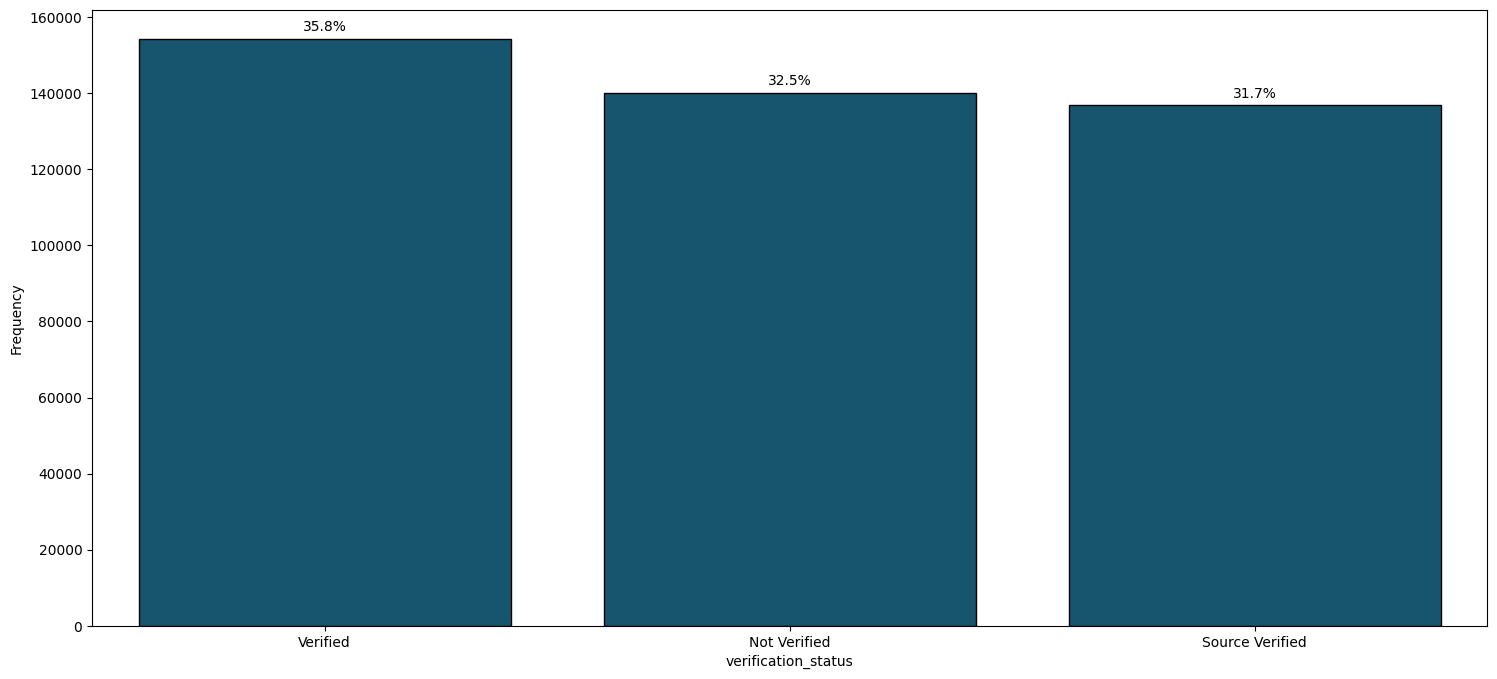

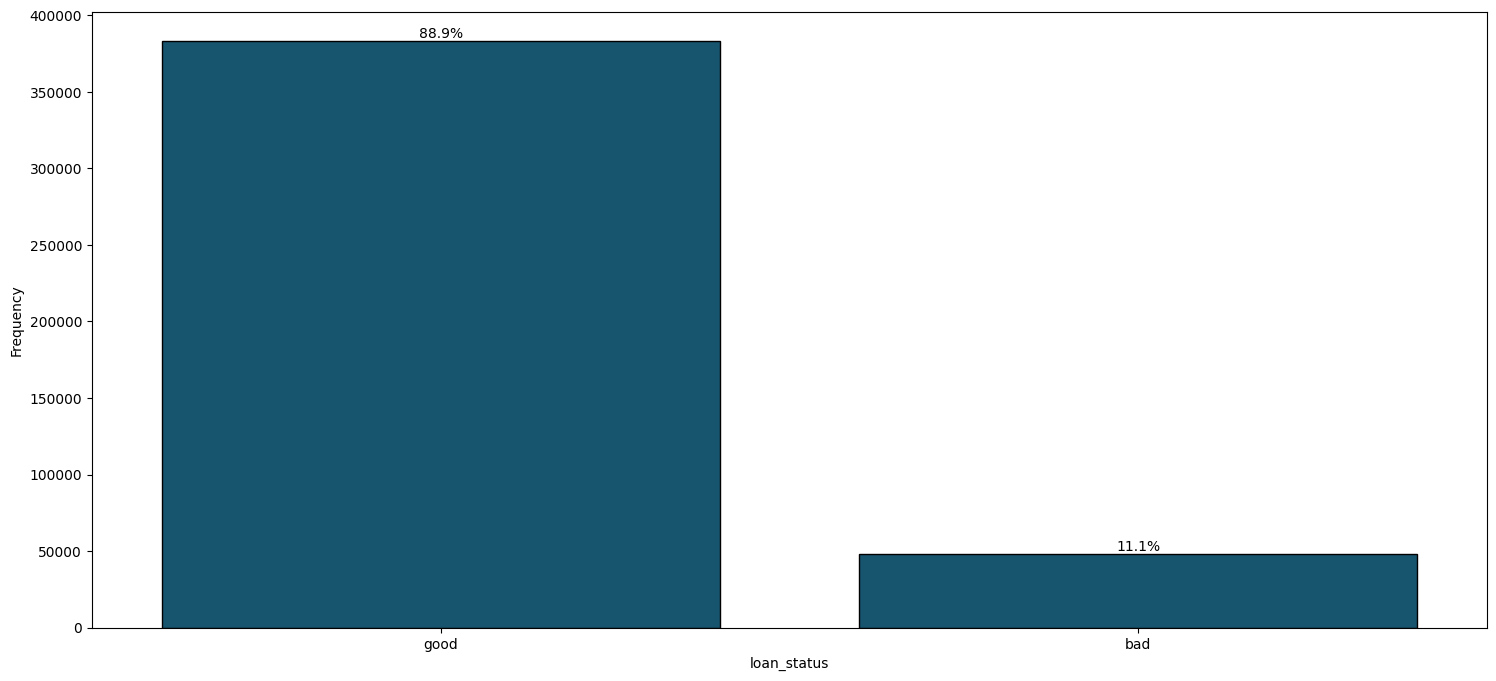

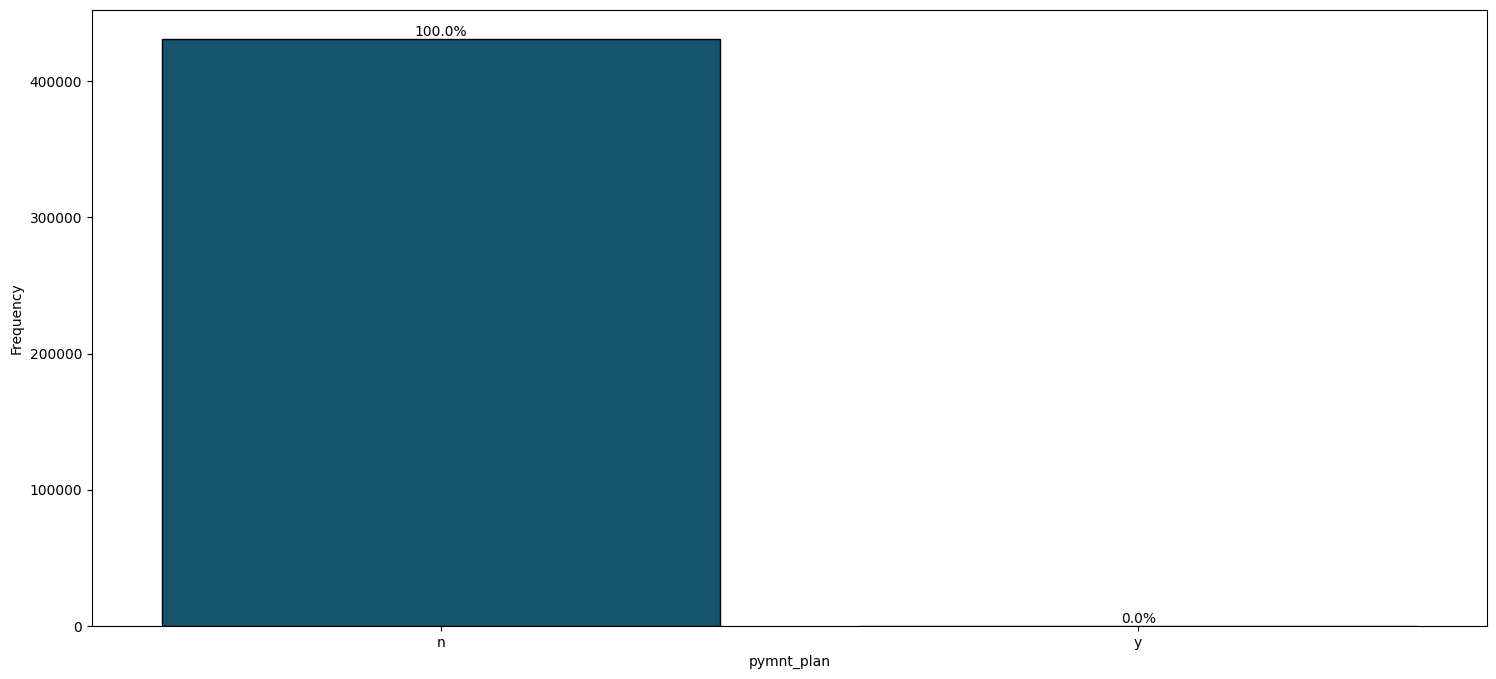

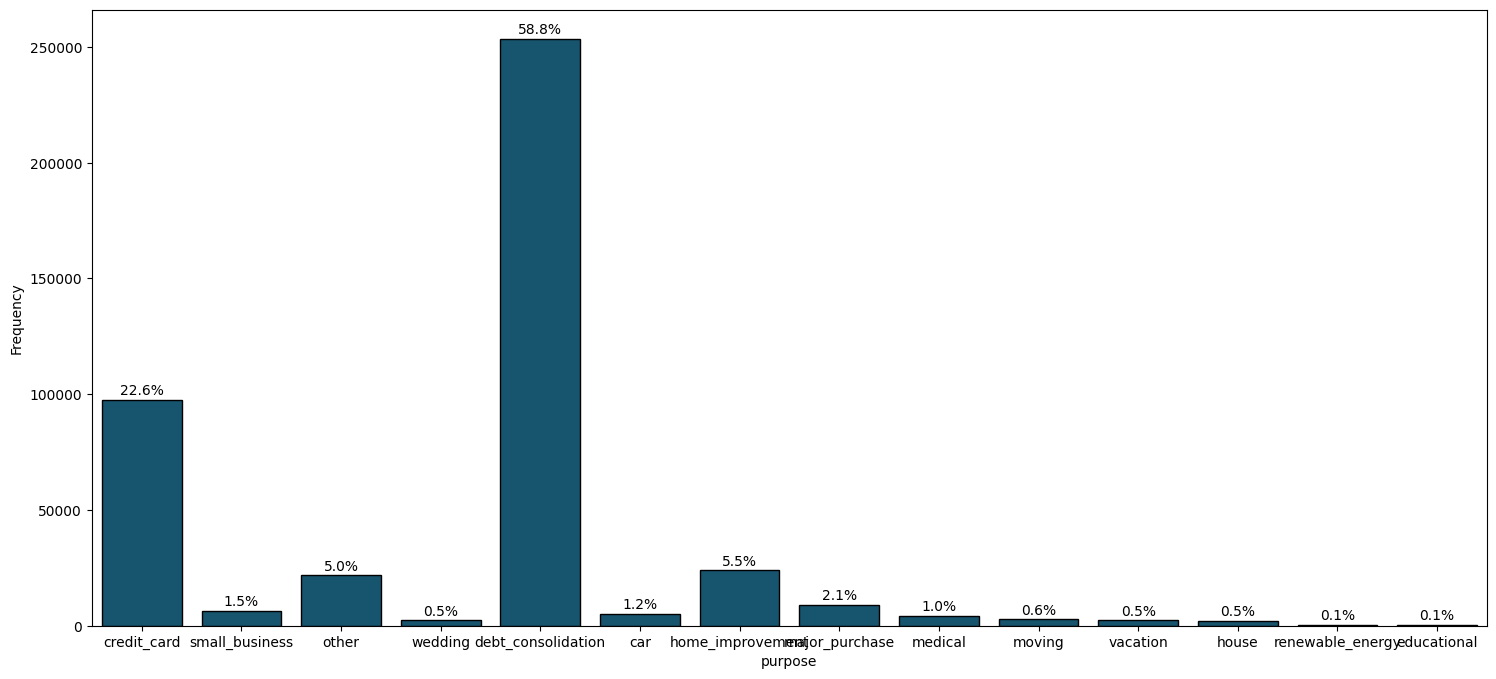

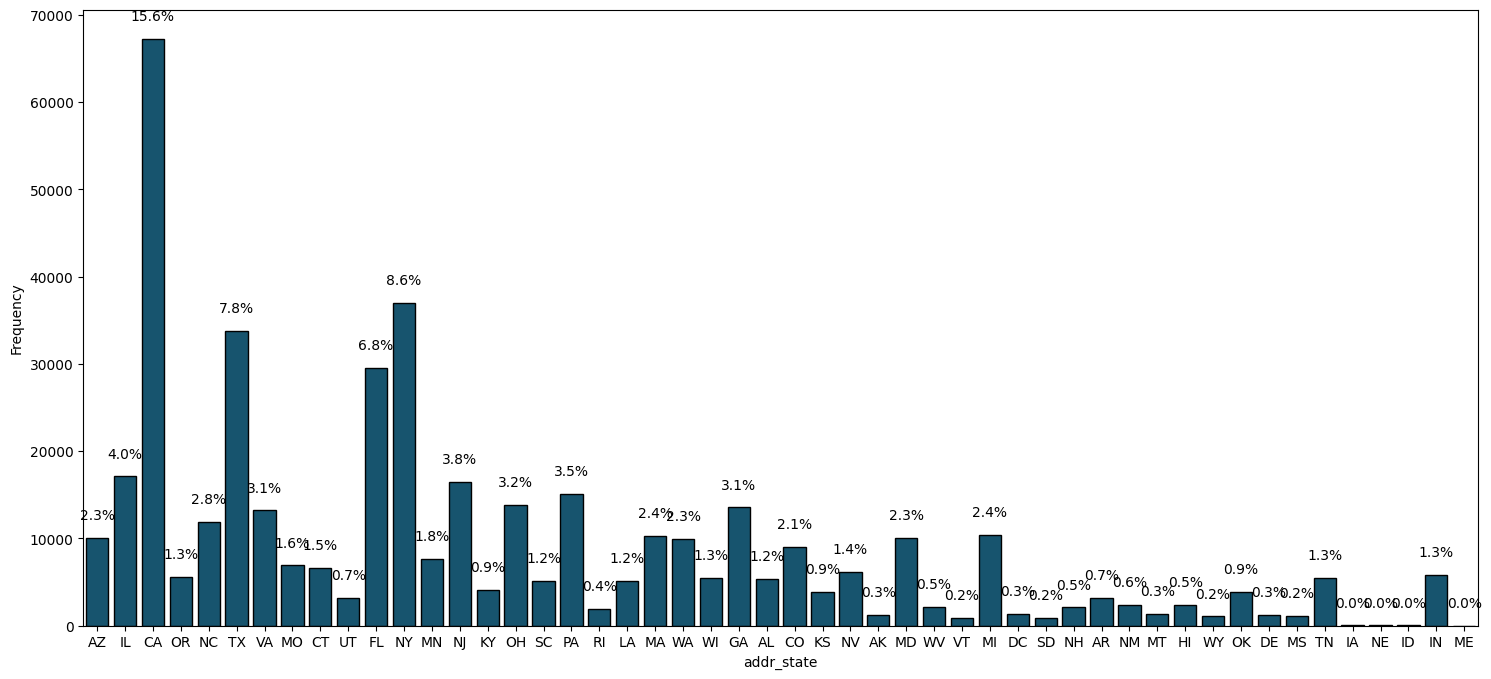

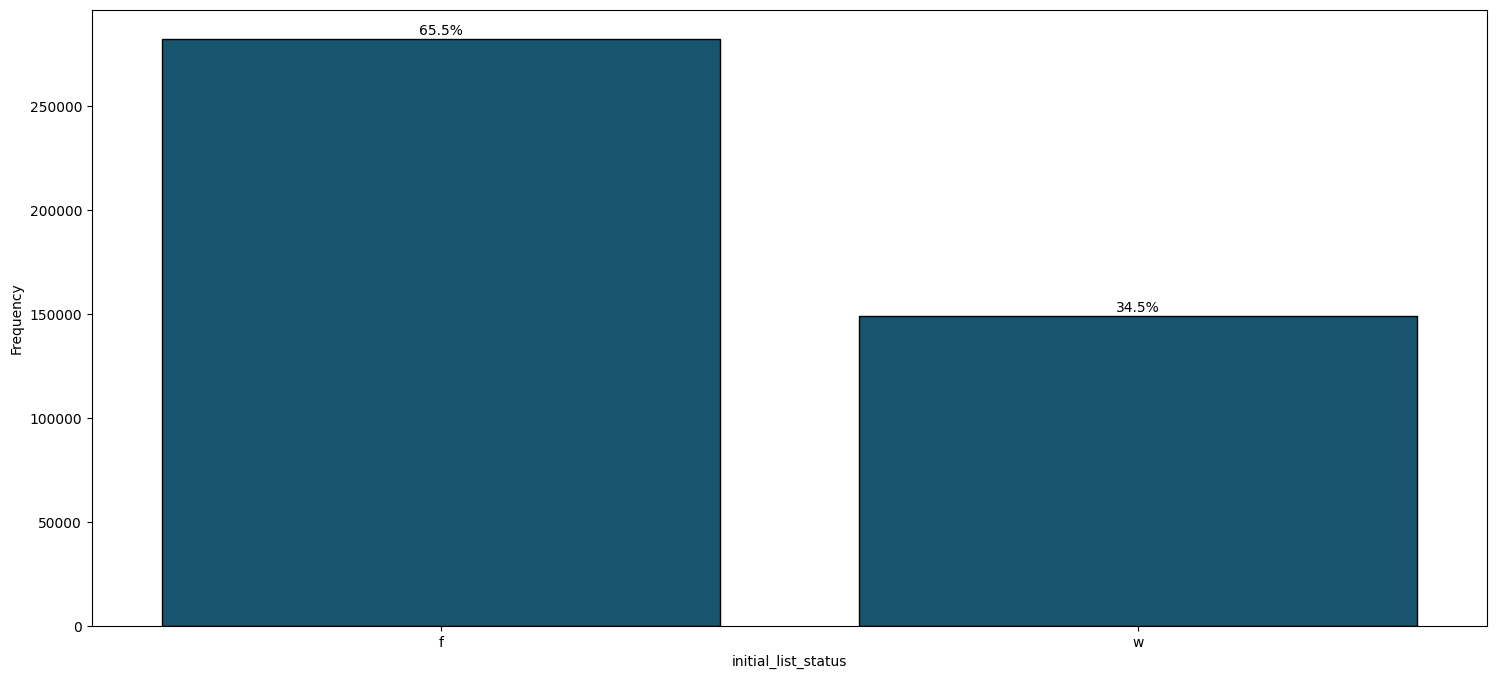

In [22]:
for column in df.select_dtypes(include='object'):
    plt.figure(figsize=(18,8))
    ax = sns.countplot(x=df[column], edgecolor='k', color='#085A7D')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Menambahkan label persentase di atas setiap bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.005 * total  # Sesuaikan dengan posisi label
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()


## Numerical Columns

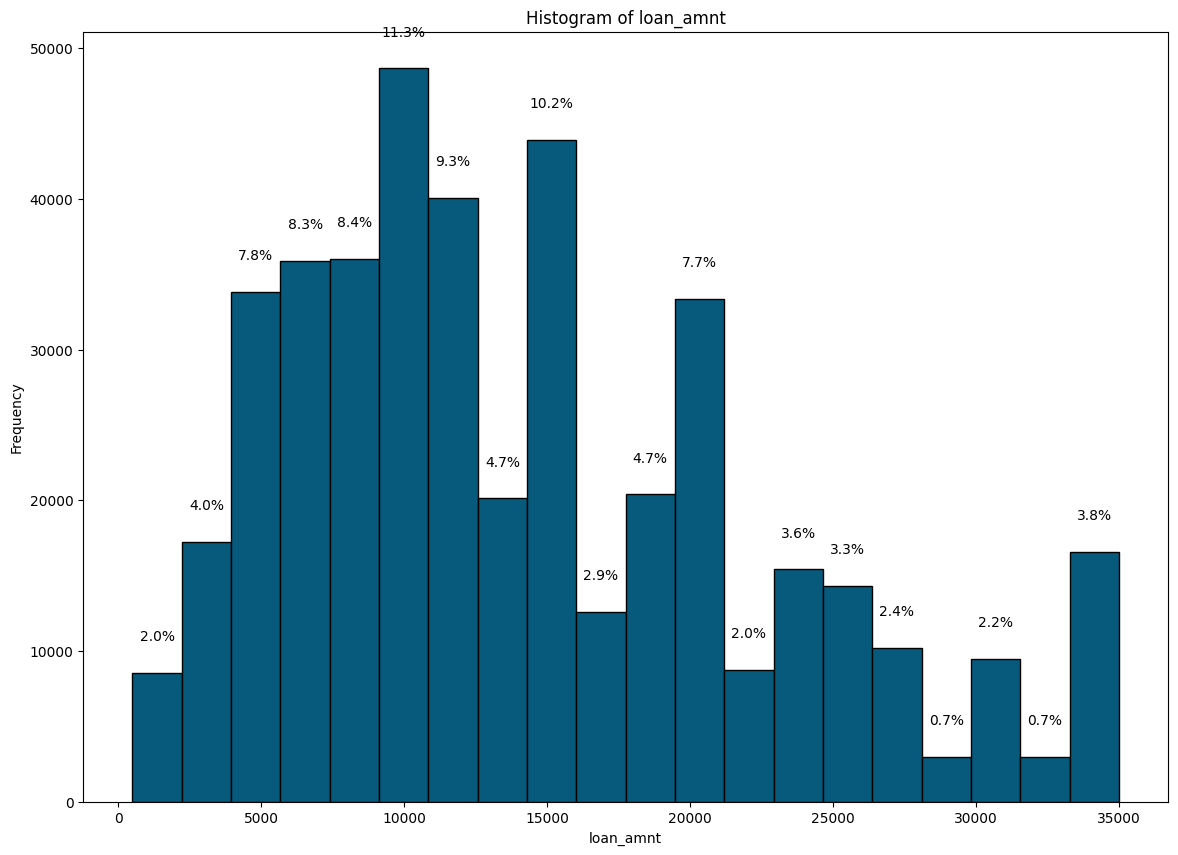

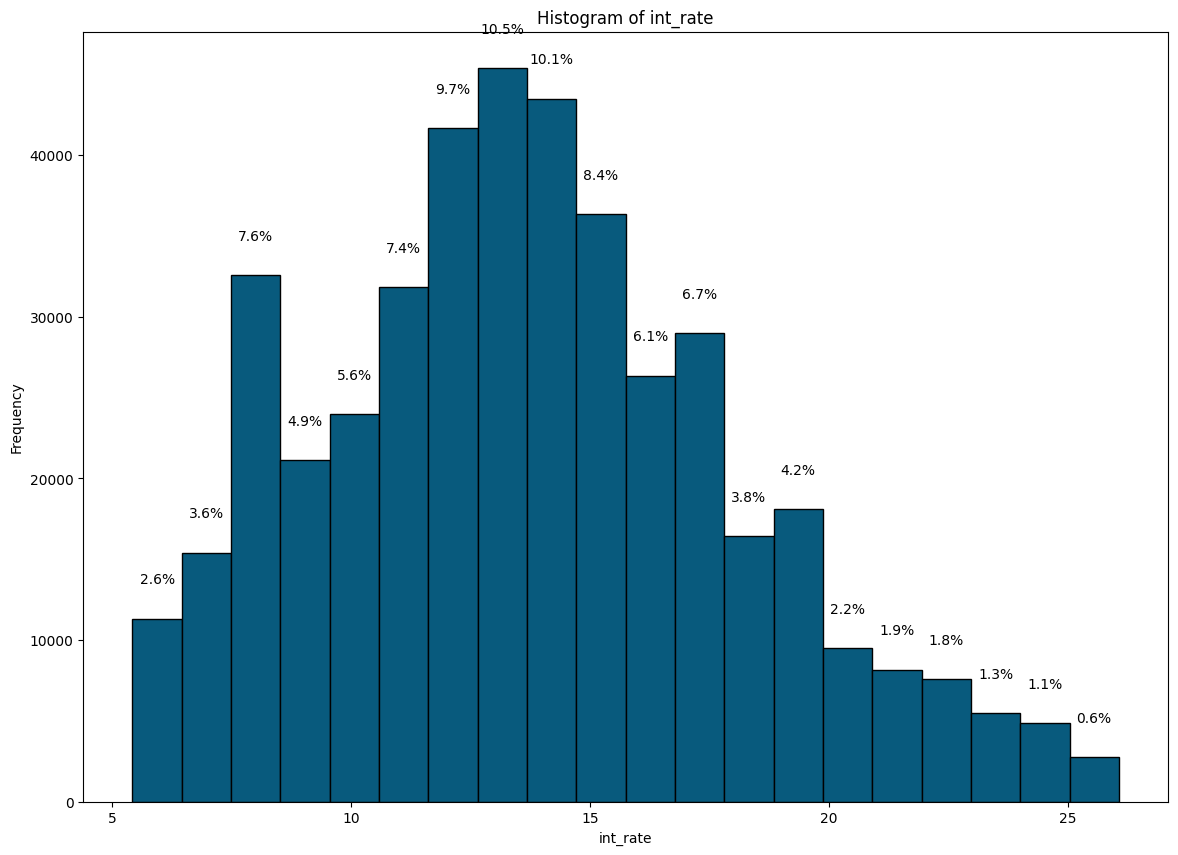

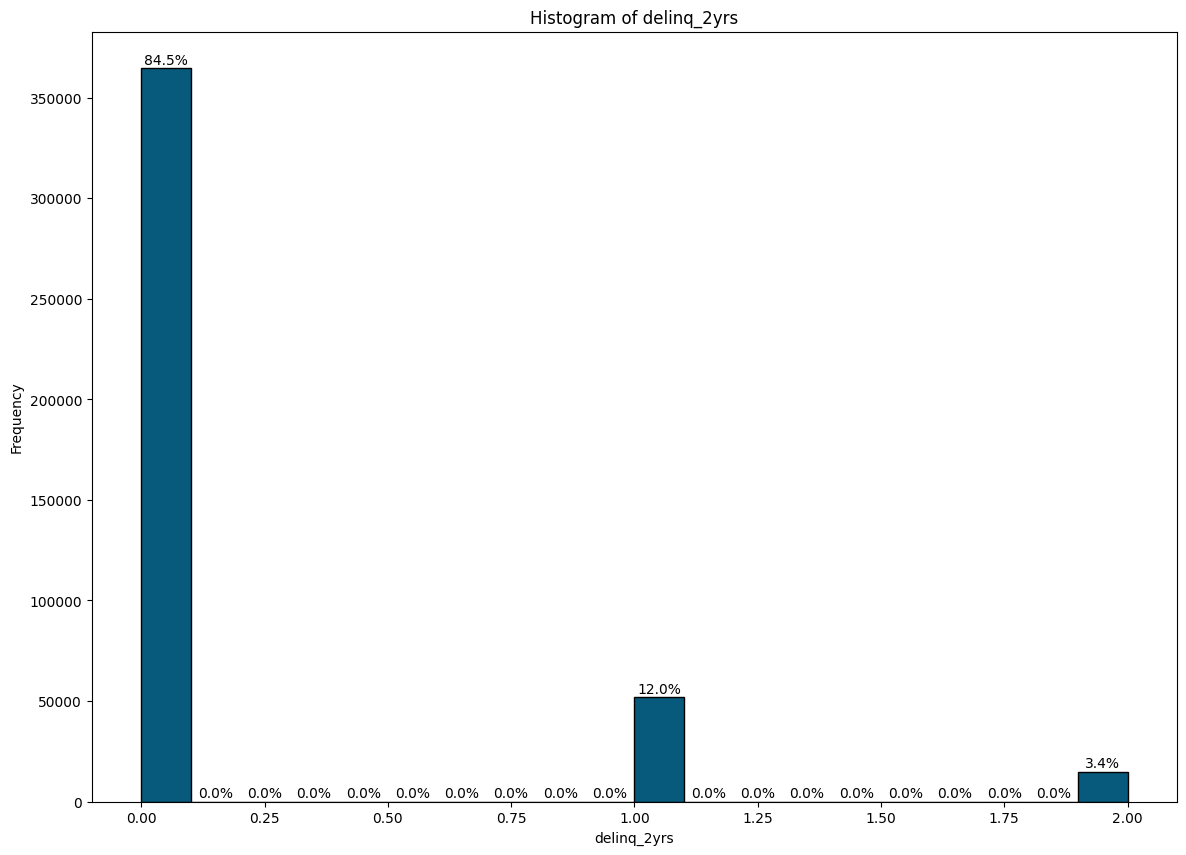

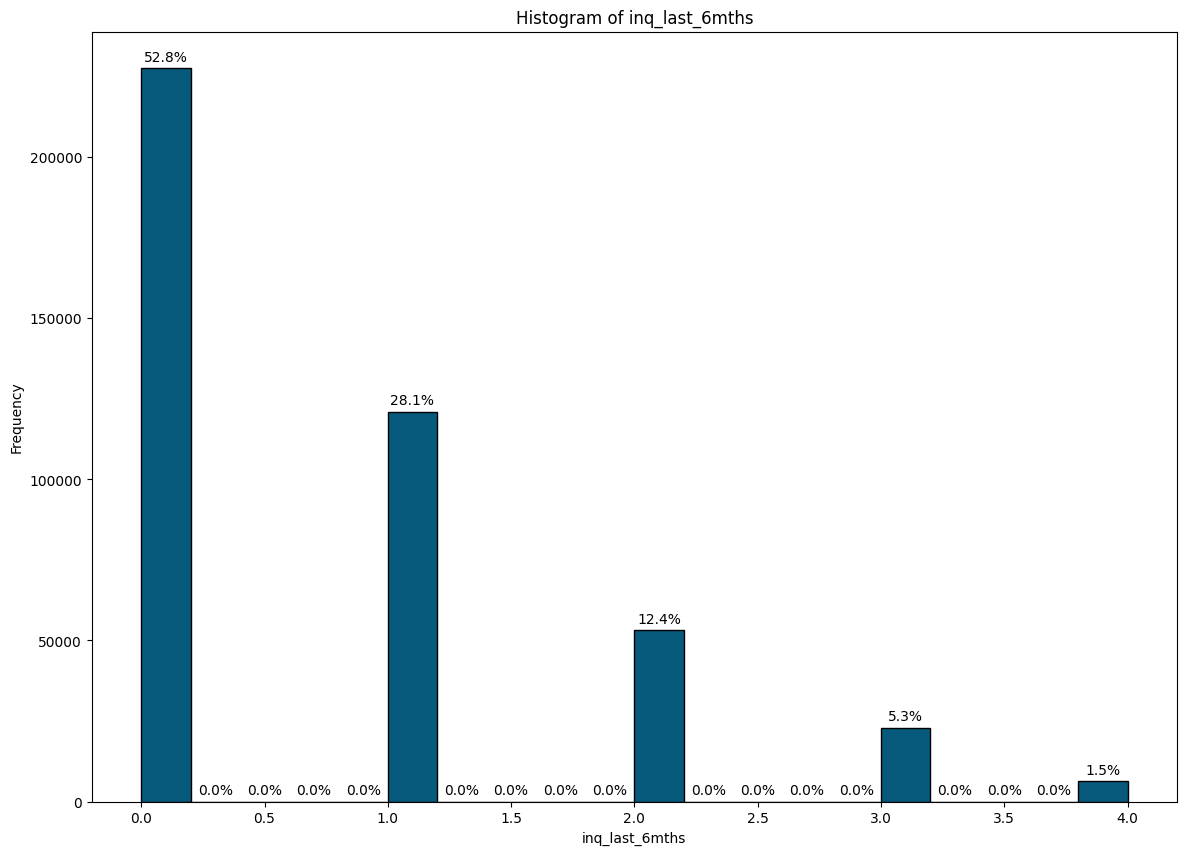

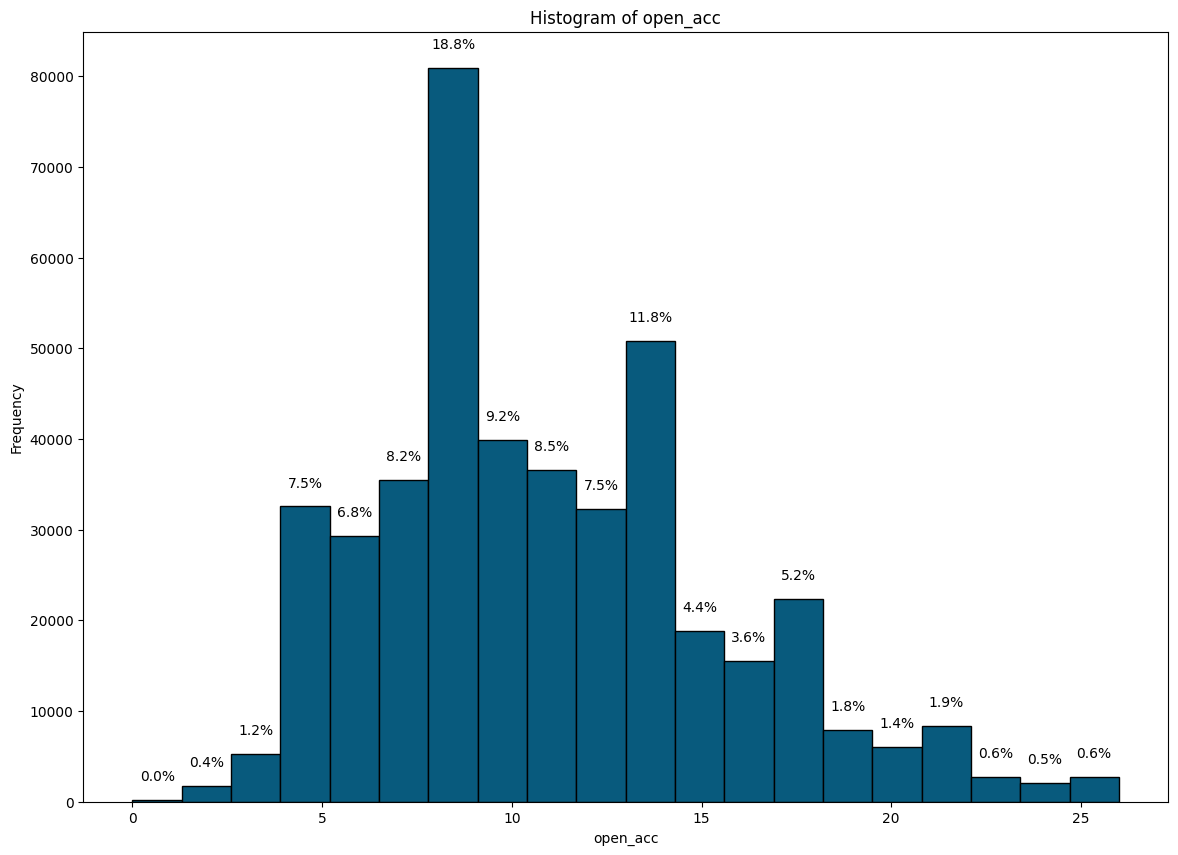

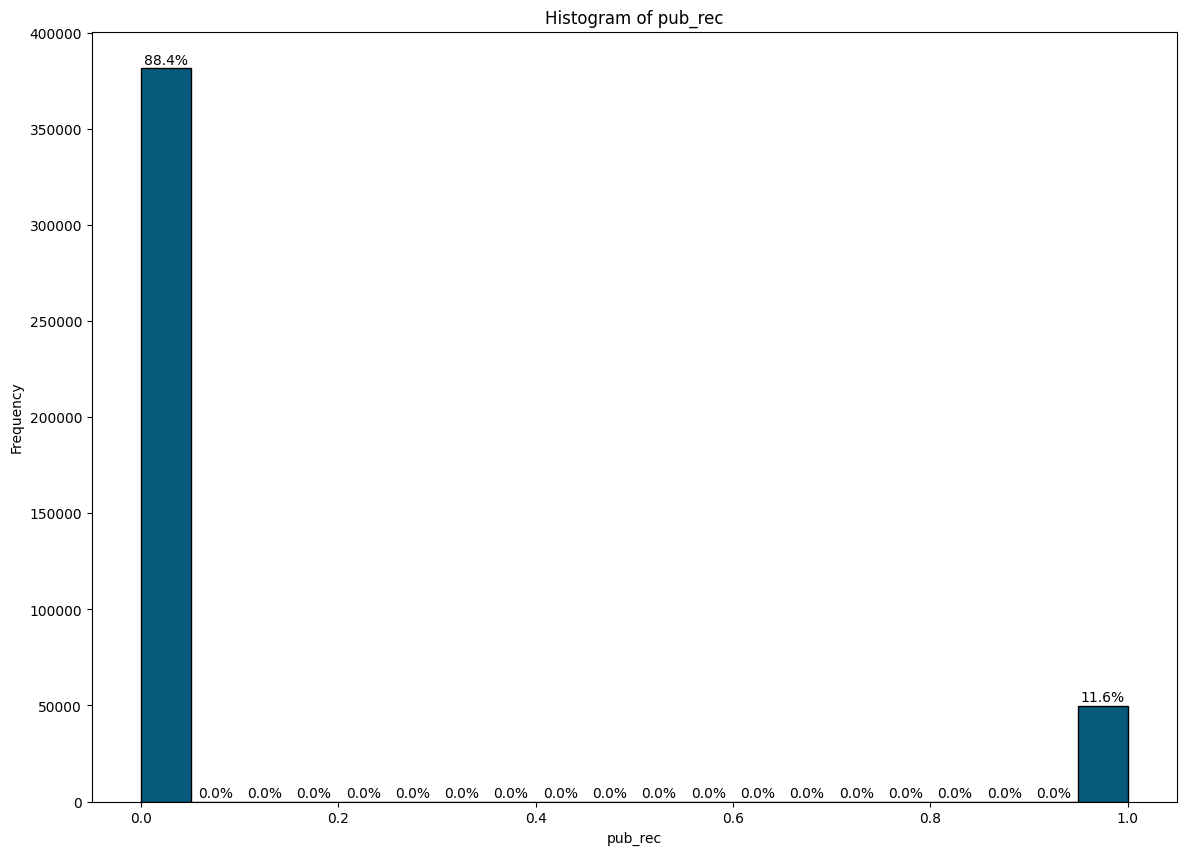

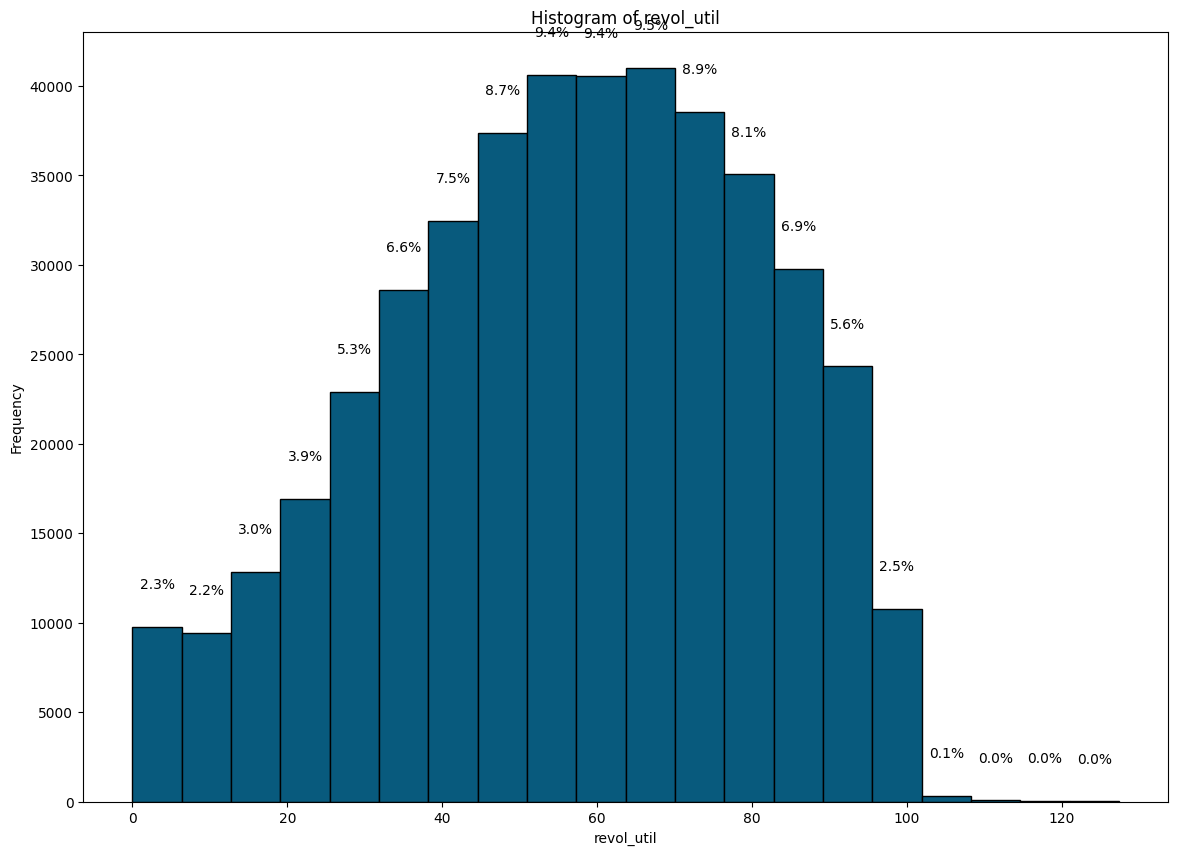

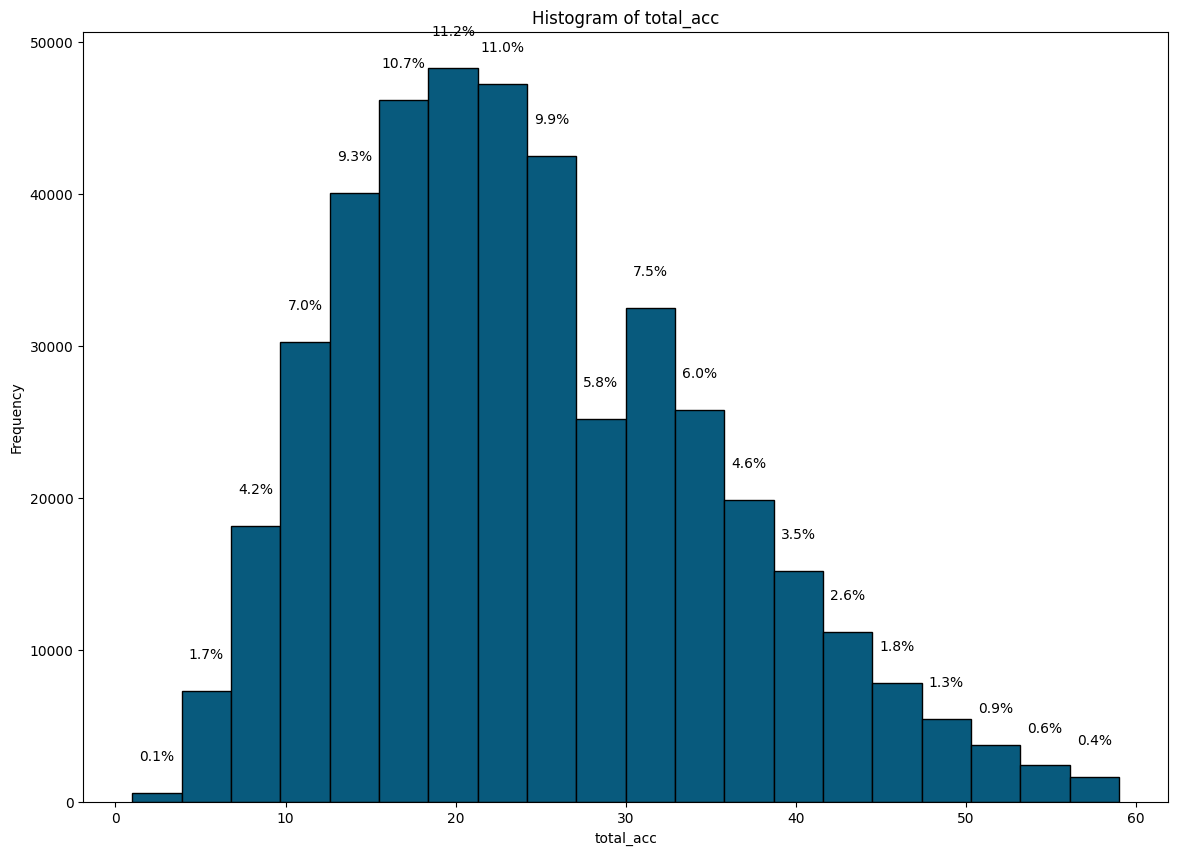

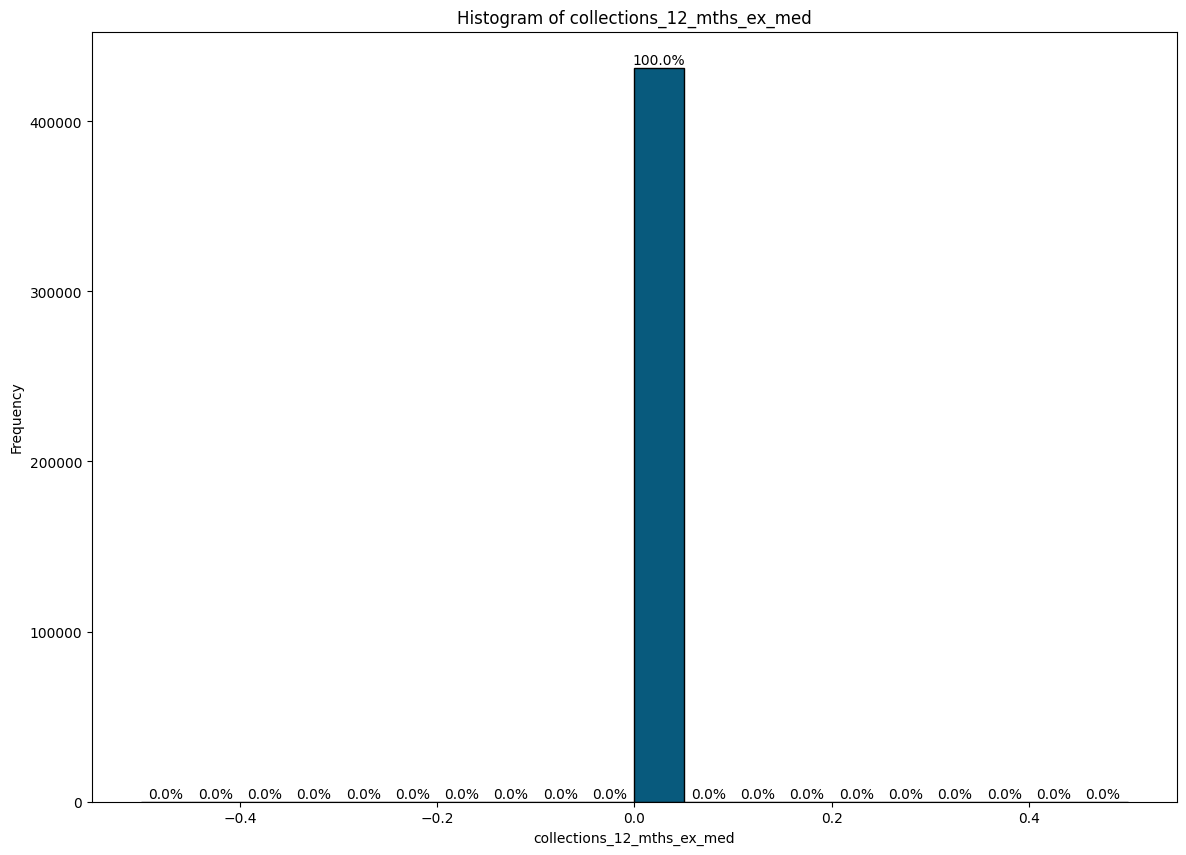

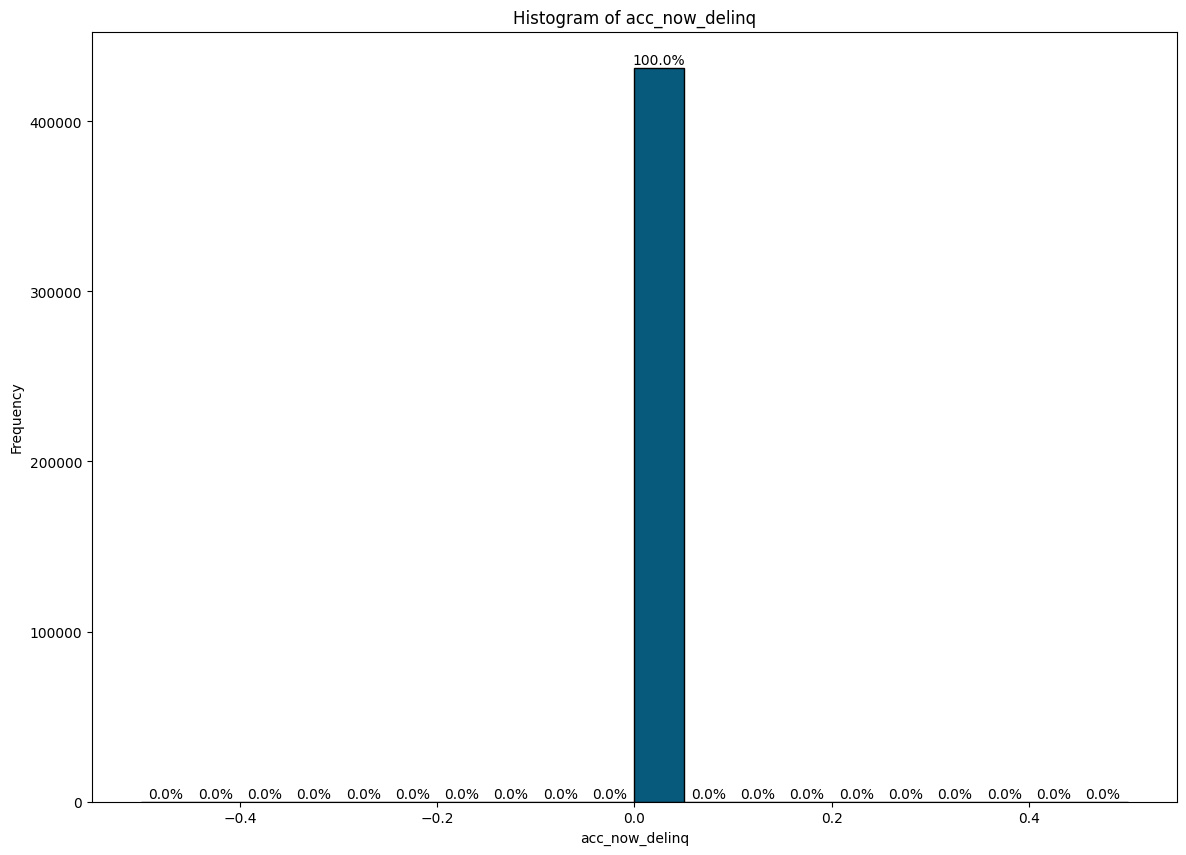

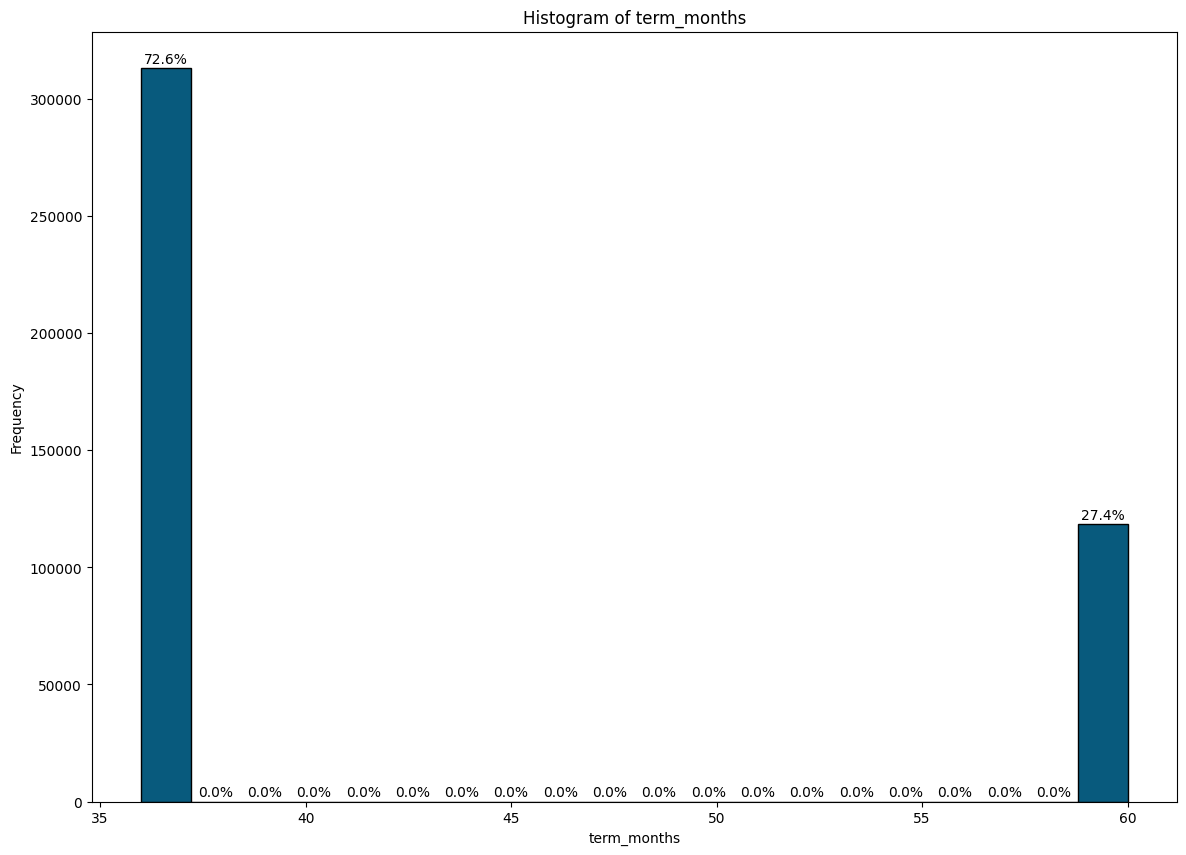

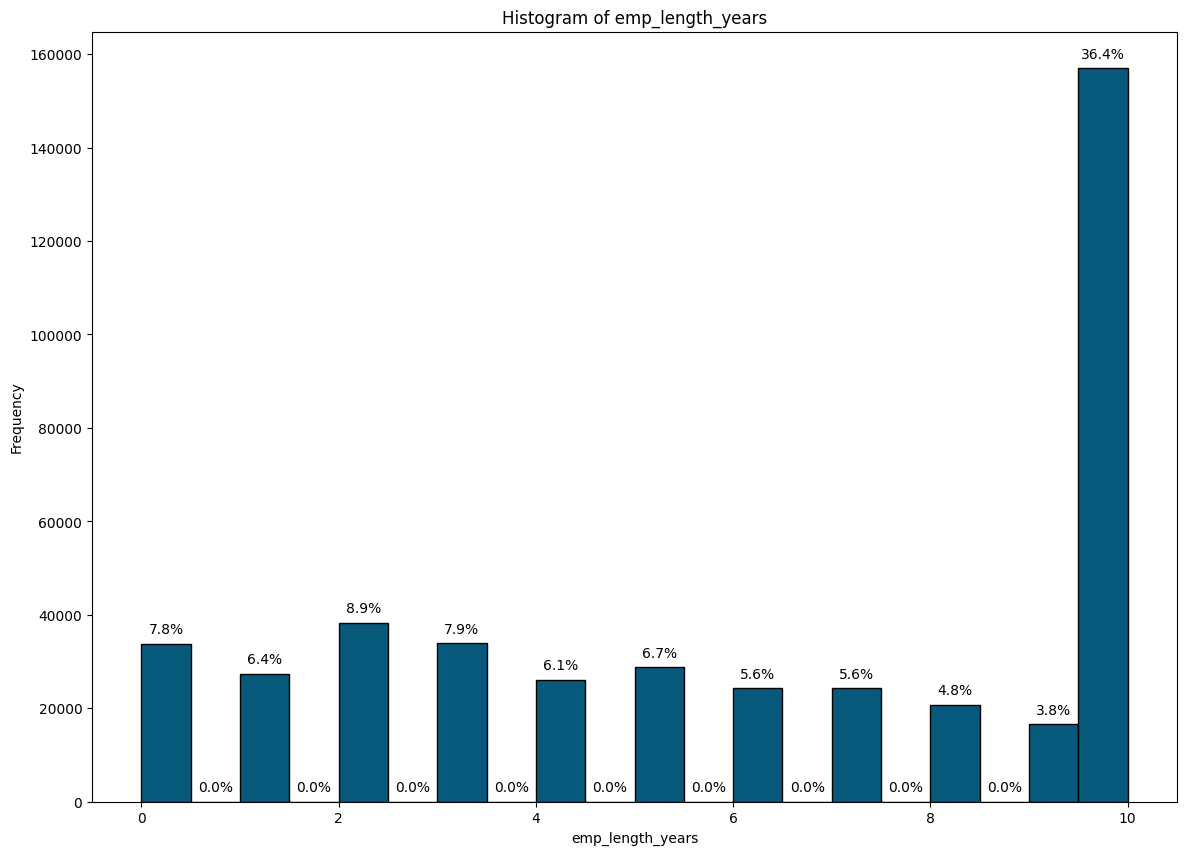

In [23]:
for column in df.select_dtypes(include=np.number):
    plt.figure(figsize=(14, 10))
    plt.hist(df[column], bins=20, edgecolor='k', color='#085A7D')
    plt.title(f'Histogram of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)

    total = len(df[column])
    for rect in plt.gca().patches:
        height = rect.get_height()
        percentage = '{:.1f}%'.format(100 * height / total)
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.005*total, percentage, ha='center')
    plt.show()

## Date Columns

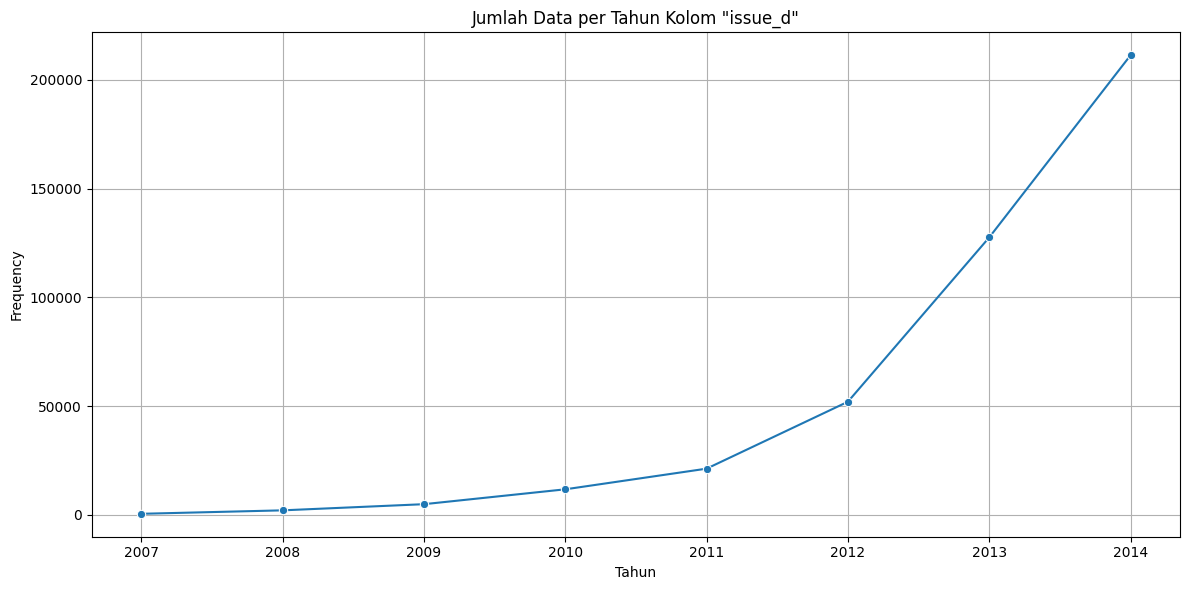

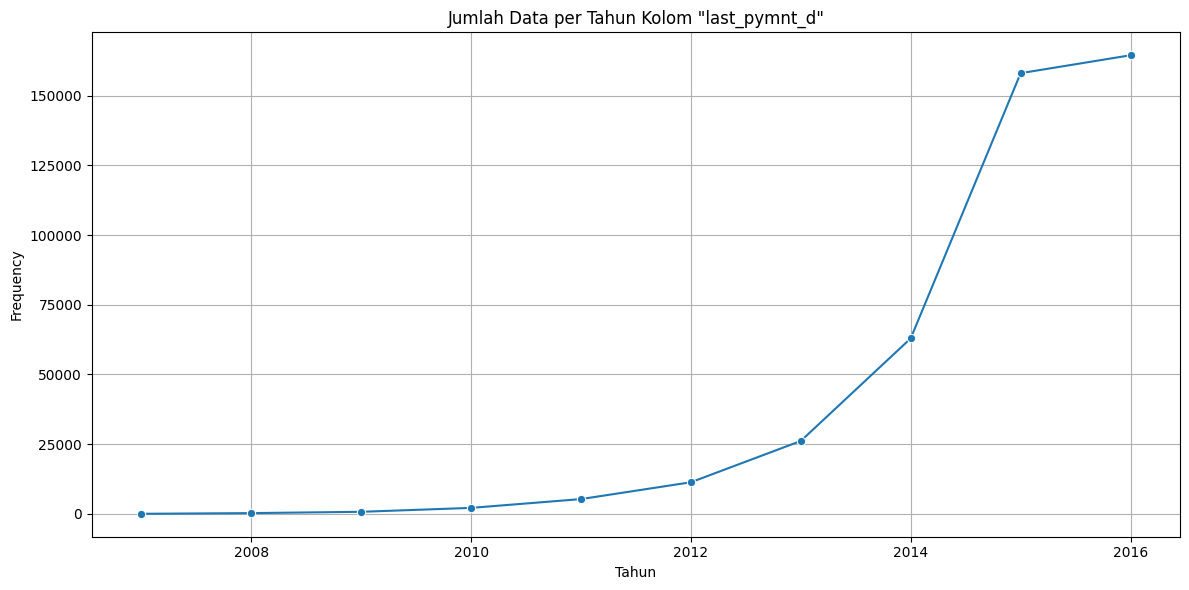

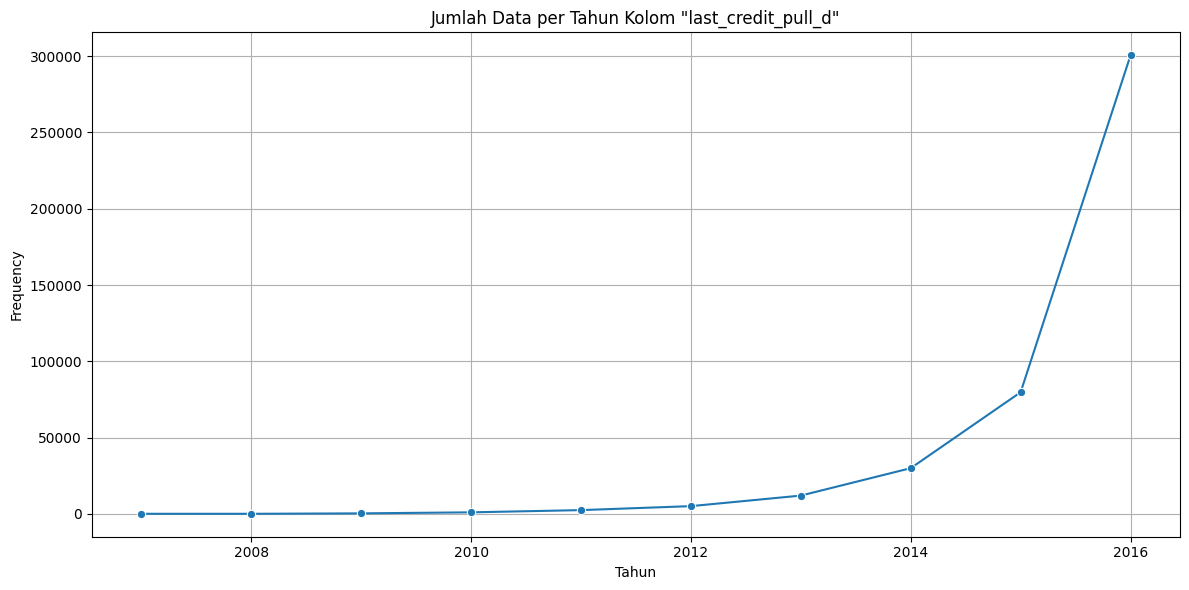

In [24]:
for column in df.select_dtypes(include='datetime'):
    plt.figure(figsize=(12, 6))
    grouped_data = df.groupby(df[column].dt.year).size().reset_index(name='count')
    line_plot = sns.lineplot(x=grouped_data[column], y=grouped_data['count'], marker='o')
    plt.title(f'Jumlah Data per Tahun Kolom "{column}"')
    plt.xlabel('Tahun')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Bivariate Analysis

## Correlation All Pair Independent Columns

Untuk melihat korelasi antar pasangan kolom independen, digunakan correlation plot dan heatmap matrix. Angka korelasi dapat dibagi menjadi 5 kategori berikut:
1. Strong Positive Correlation (0,5 hingga 1): Ketika angka korelasinya 1, itu menunjukkan hubungan linear positif sempurna antara dua variabel. Ini berarti ketika satu variabel naik, yang lain juga naik secara linier.
2. Weak Positive Correlation (0 hingga 0,5): Ketika angka korelasi berada di antara 0 dan 1 (tidak mencapai 1), itu menunjukkan hubungan positif antara dua variabel, tetapi tidak sempurna. Semakin mendekati 1, semakin kuat hubungannya.
3. No Correlation (0): Angka korelasi 0 menunjukkan bahwa tidak ada hubungan linier antara dua variabel. Ini berarti perubahan dalam satu variabel tidak memiliki pengaruh linier pada variabel lainnya.
4. Weak Negative Correlation (0 hingga -0,5): Ketika angka korelasi berada di antara 0 dan -1 (tidak mencapai -1), itu menunjukkan hubungan negatif antara dua variabel, tetapi tidak sempurna. Semakin mendekati -1, semakin kuat hubungannya.
5. Strong Negative Correlation(-0,5 hingga -1): Ketika angka korelasinya -1, itu menunjukkan hubungan linear negatif sempurna antara dua variabel. Ini berarti ketika satu variabel naik, yang lain turun secara linier.

In [25]:
numeric_df = df.select_dtypes(include=[np.number])
cor_data = numeric_df.corr(method='pearson')
cor_data.round(2)

,loan_amnt,int_rate,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,term_months,emp_length_years
loan_amnt,1.00,0.17,0.02,-0.02,0.21,-0.11,0.12,0.24,NaN,NaN,0.41,0.10
int_rate,0.17,1.00,0.08,0.21,0.01,0.06,0.34,-0.05,NaN,NaN,0.44,0.03
delinq_2yrs,0.02,0.08,1.00,0.01,0.05,-0.03,-0.01,0.11,NaN,NaN,0.01,0.03
inq_last_6mths,-0.02,0.21,0.01,1.00,0.09,0.04,-0.08,0.12,NaN,NaN,0.01,-0.01
open_acc,0.21,0.01,0.05,0.09,1.00,-0.04,-0.11,0.66,NaN,NaN,0.08,0.04
pub_rec,-0.11,0.06,-0.03,0.04,-0.04,1.00,-0.07,0.02,NaN,NaN,-0.02,0.06
revol_util,0.12,0.34,-0.01,-0.08,-0.11,-0.07,1.00,-0.08,NaN,NaN,0.09,0.04
total_acc,0.24,-0.05,0.11,0.12,0.66,0.02,-0.08,1.00,NaN,NaN,0.11,0.11
collections_12_mths_ex_med,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acc_now_delinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


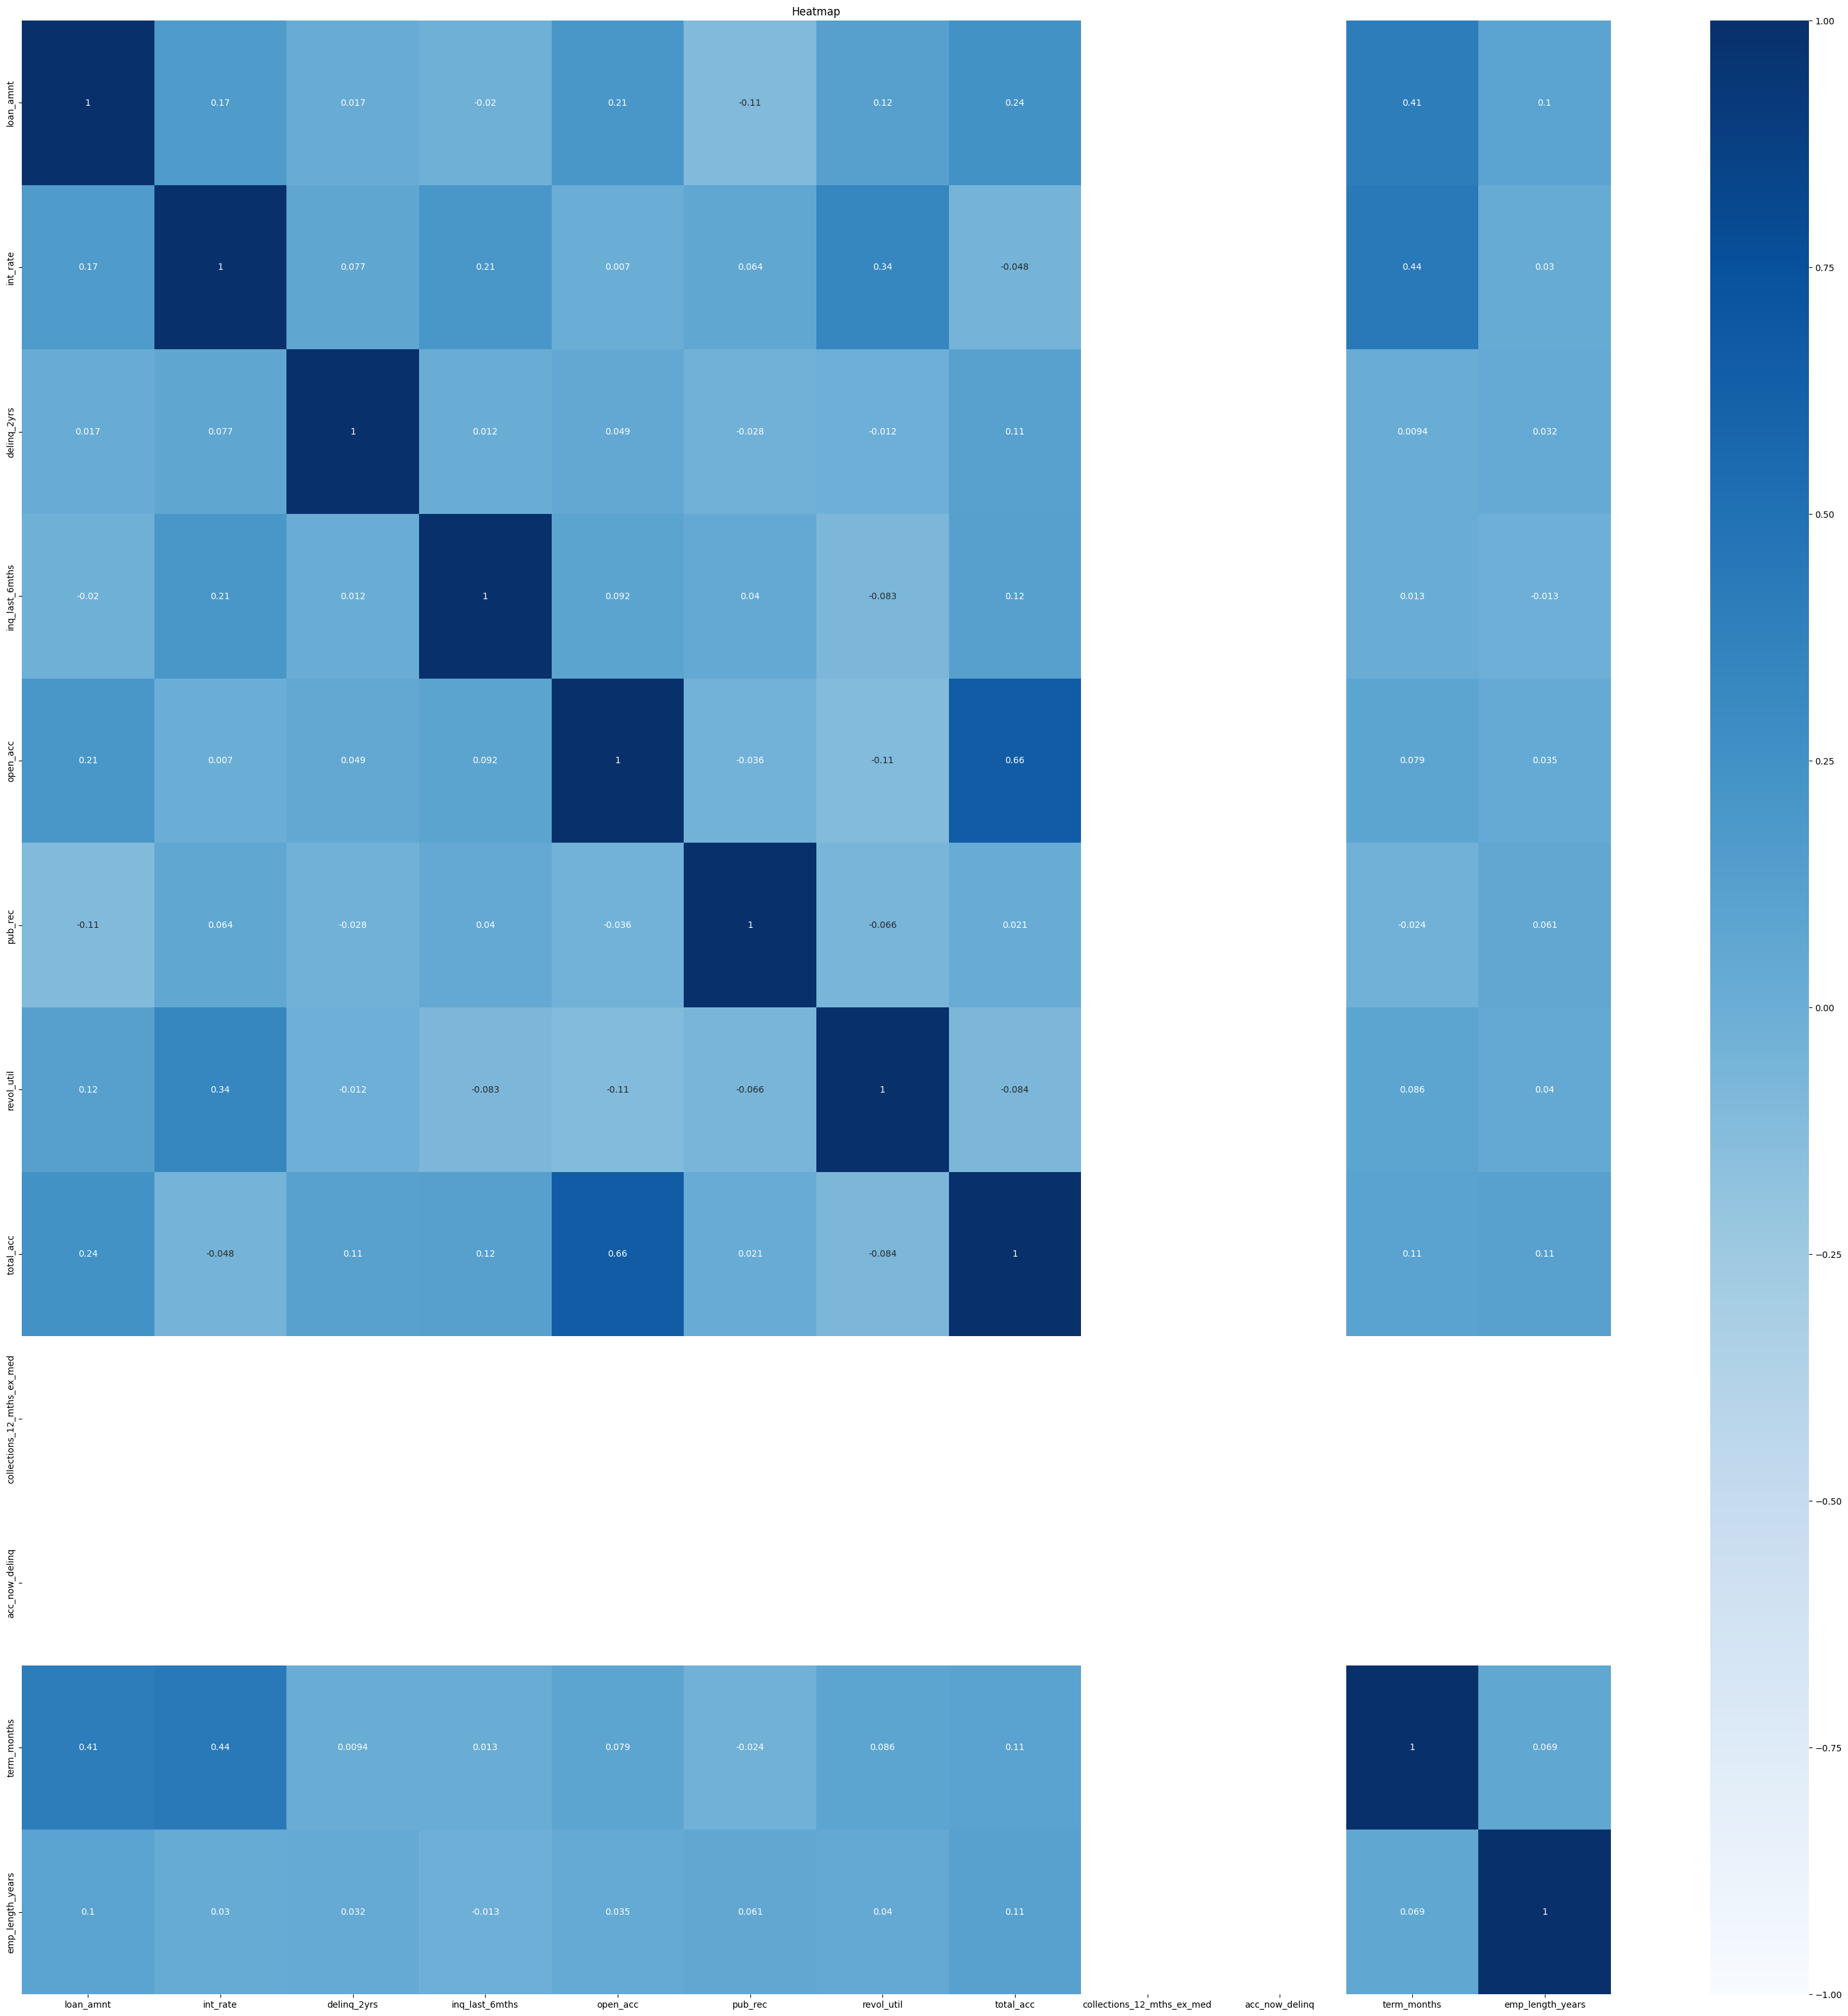

In [26]:
plt.figure(figsize=(40, 40))
sns.heatmap(cor_data, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()

Dari heatmap matrix di atas, dapat dilihat bahwa yang memiliki korelasi tinggi adalah kolom total_acc dan open_acc dengan nilai korelasi 0,66.

## Correlation Columns w/Target Column

<Figure size 1000x600 with 0 Axes>

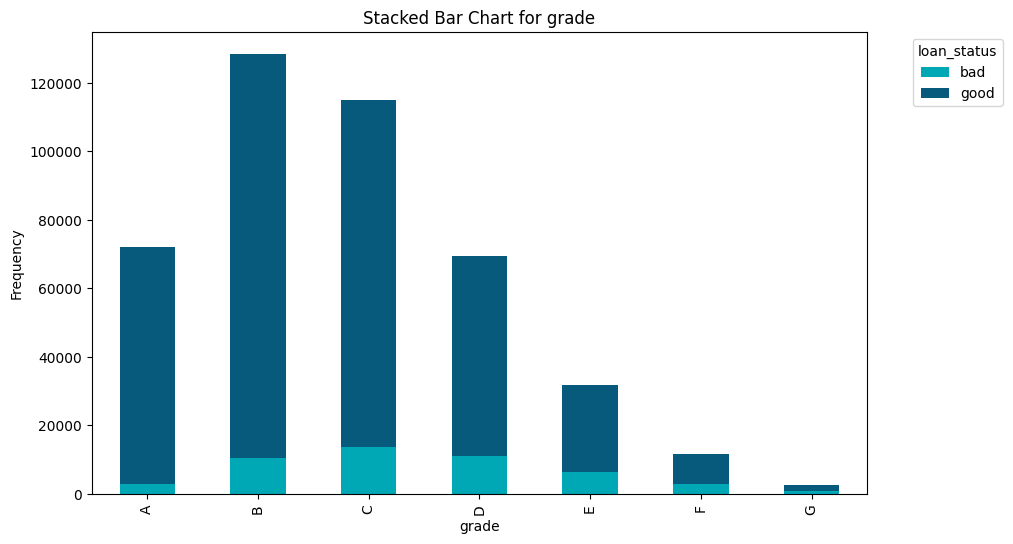

<Figure size 1000x600 with 0 Axes>

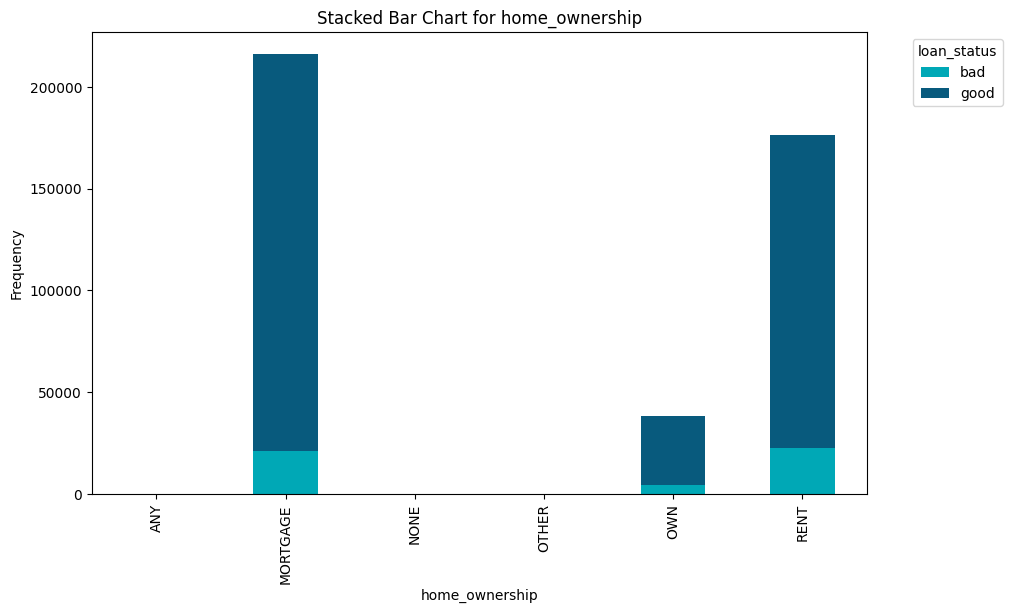

<Figure size 1000x600 with 0 Axes>

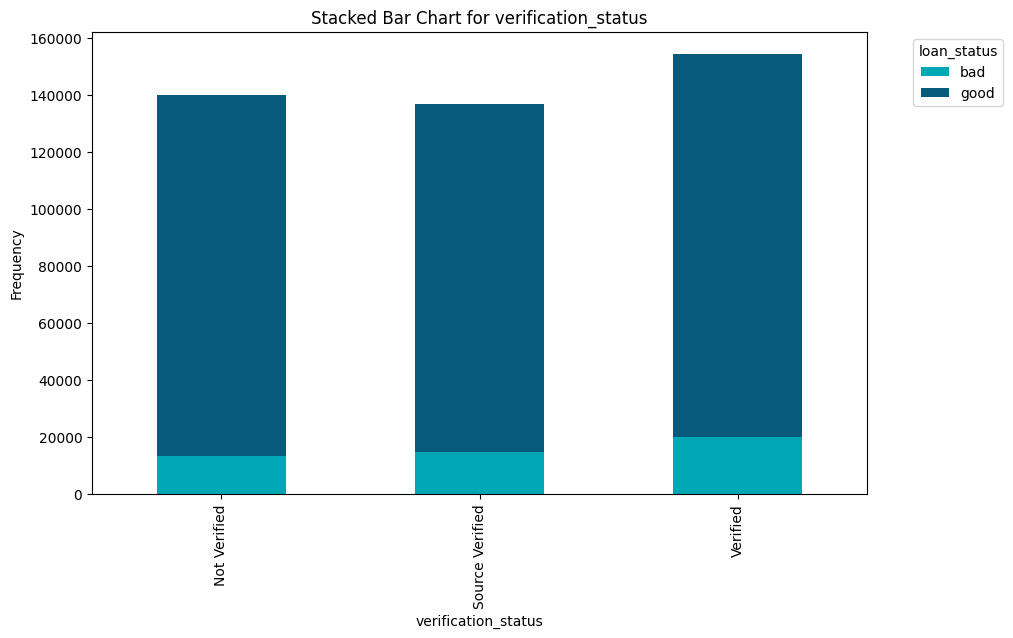

<Figure size 1000x600 with 0 Axes>

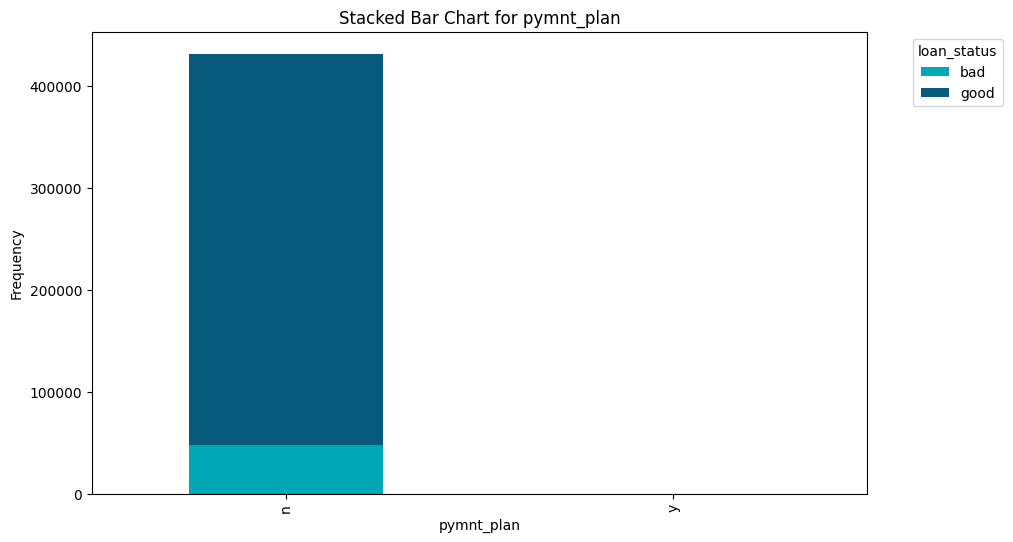

<Figure size 1000x600 with 0 Axes>

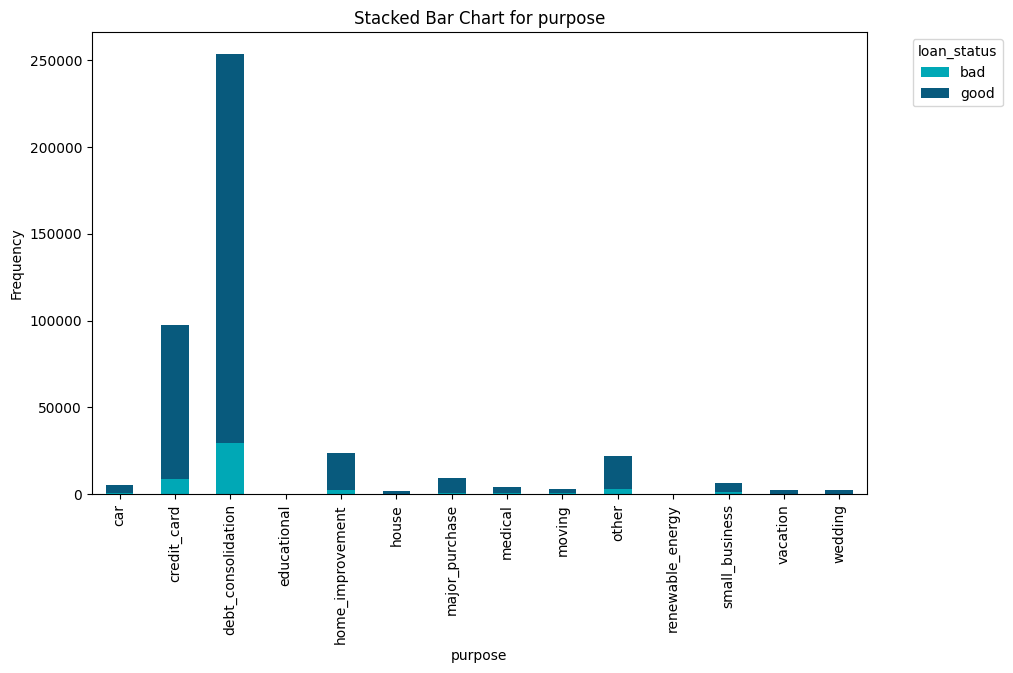

<Figure size 1000x600 with 0 Axes>

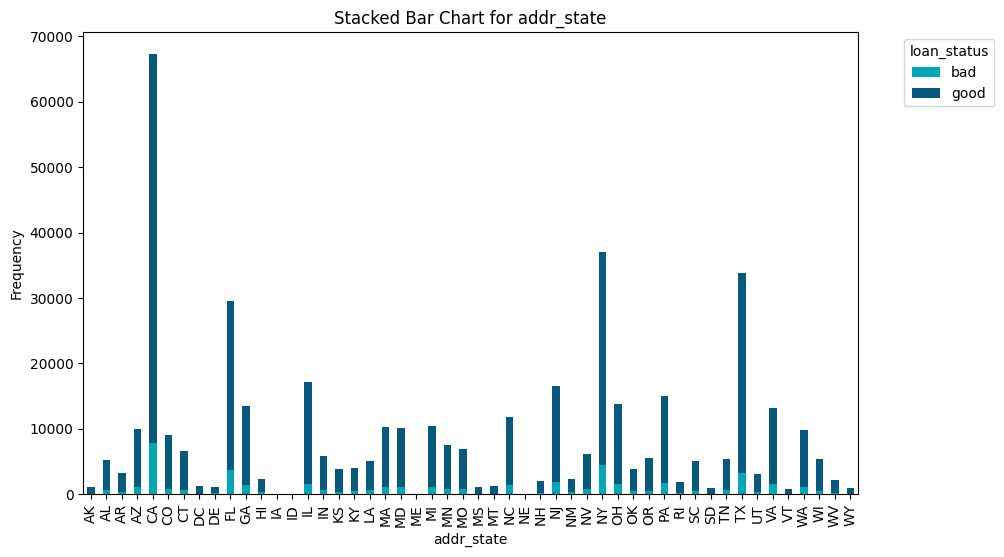

<Figure size 1000x600 with 0 Axes>

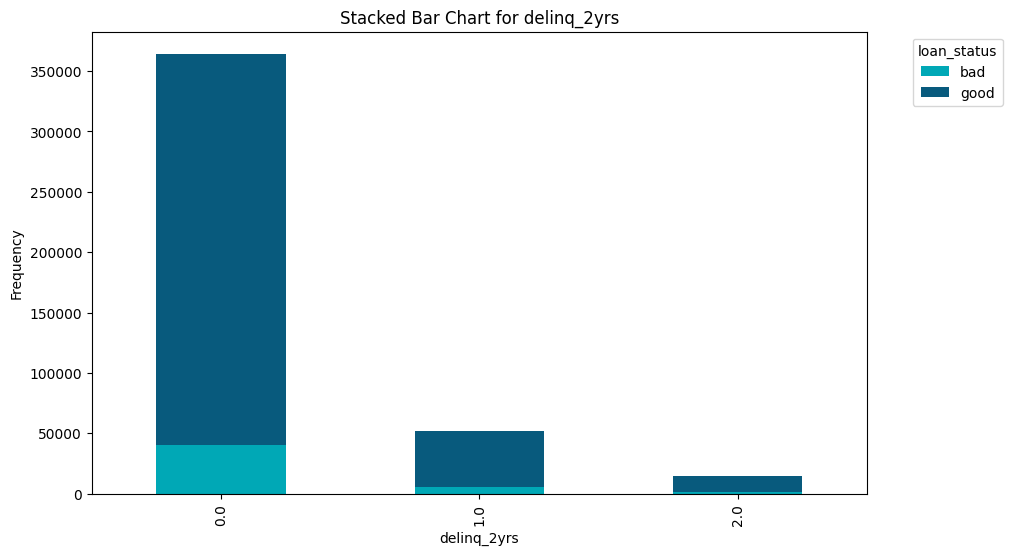

<Figure size 1000x600 with 0 Axes>

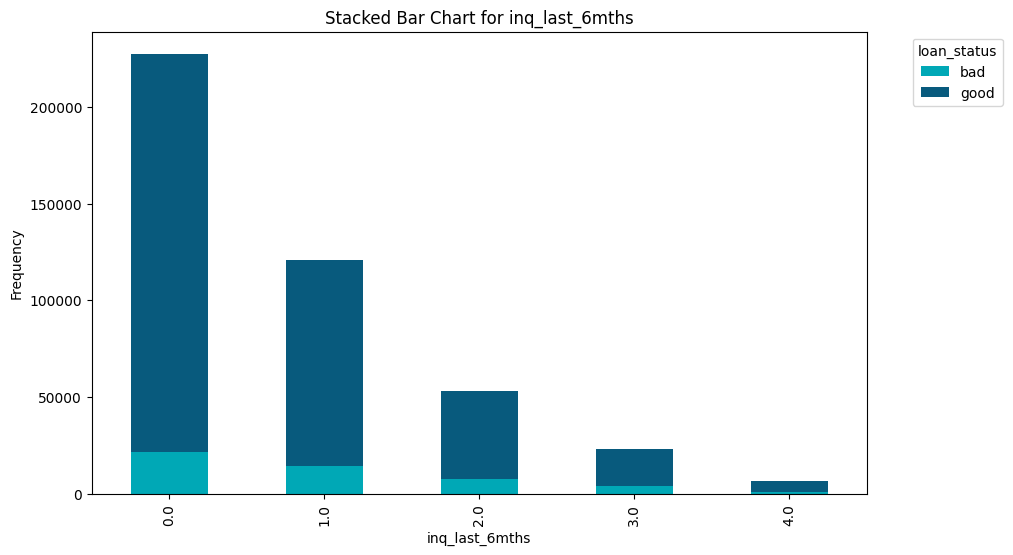

<Figure size 1000x600 with 0 Axes>

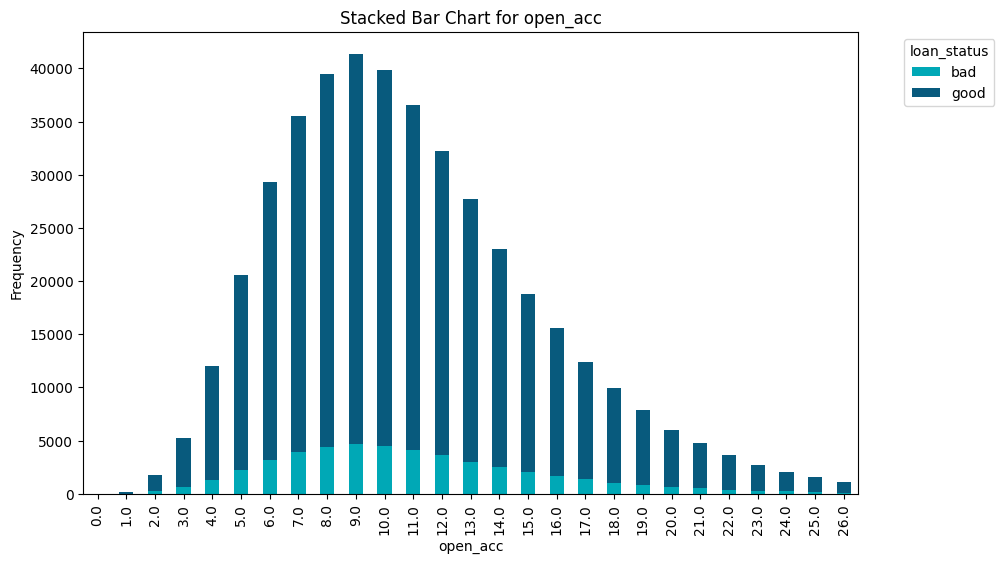

<Figure size 1000x600 with 0 Axes>

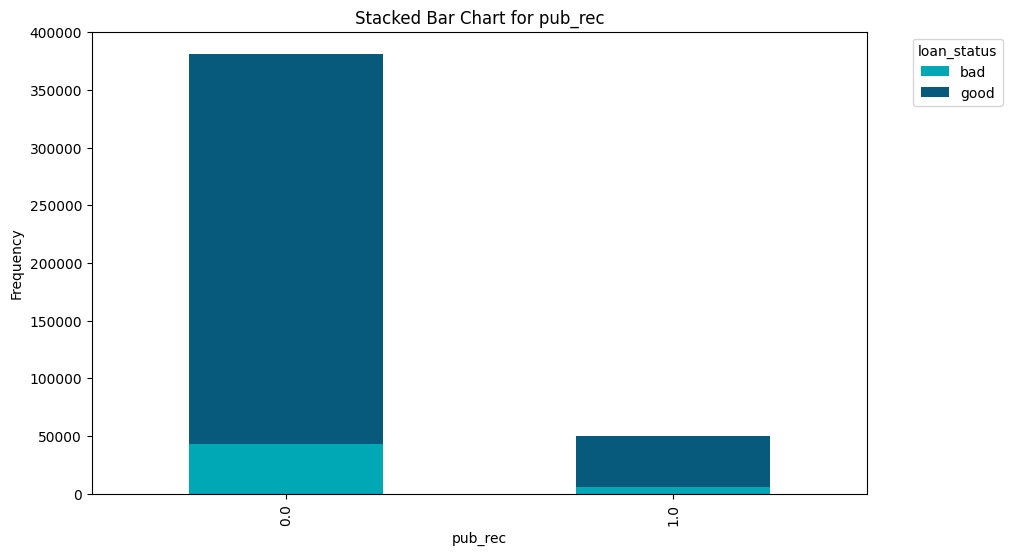

<Figure size 1000x600 with 0 Axes>

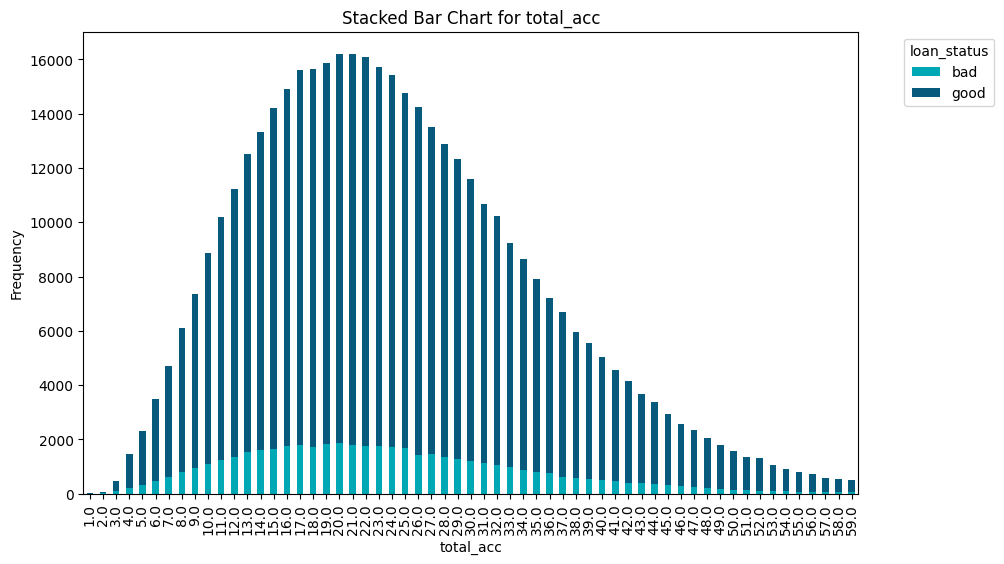

<Figure size 1000x600 with 0 Axes>

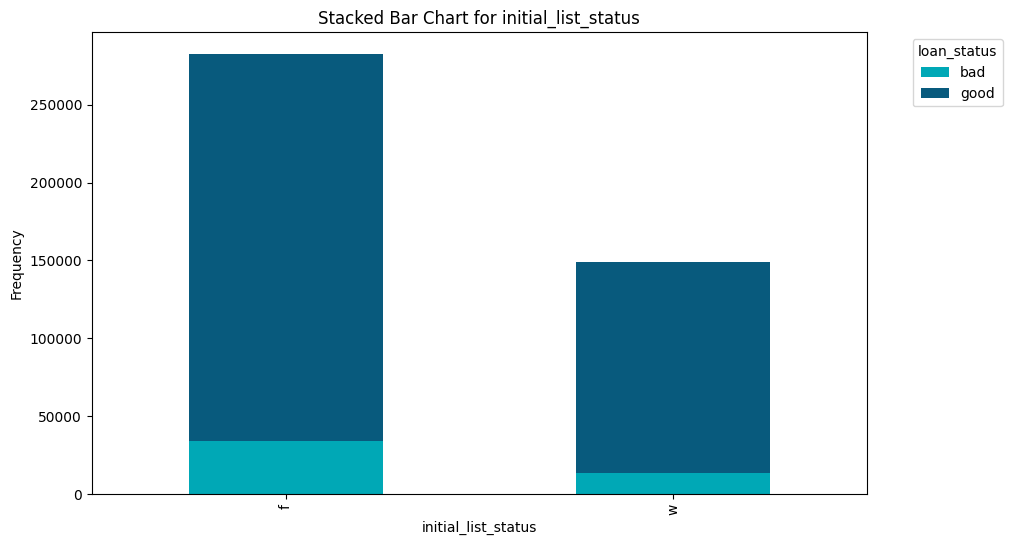

<Figure size 1000x600 with 0 Axes>

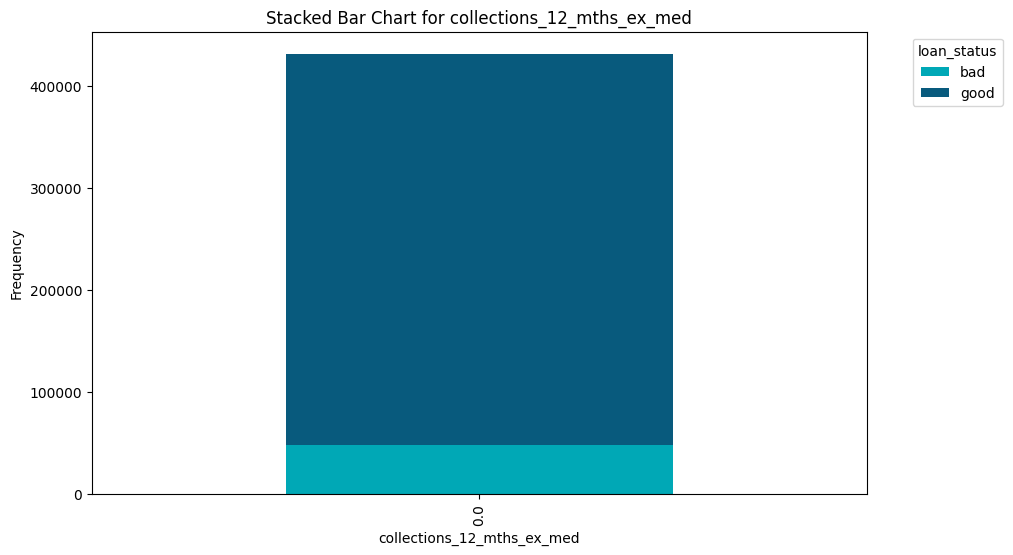

<Figure size 1000x600 with 0 Axes>

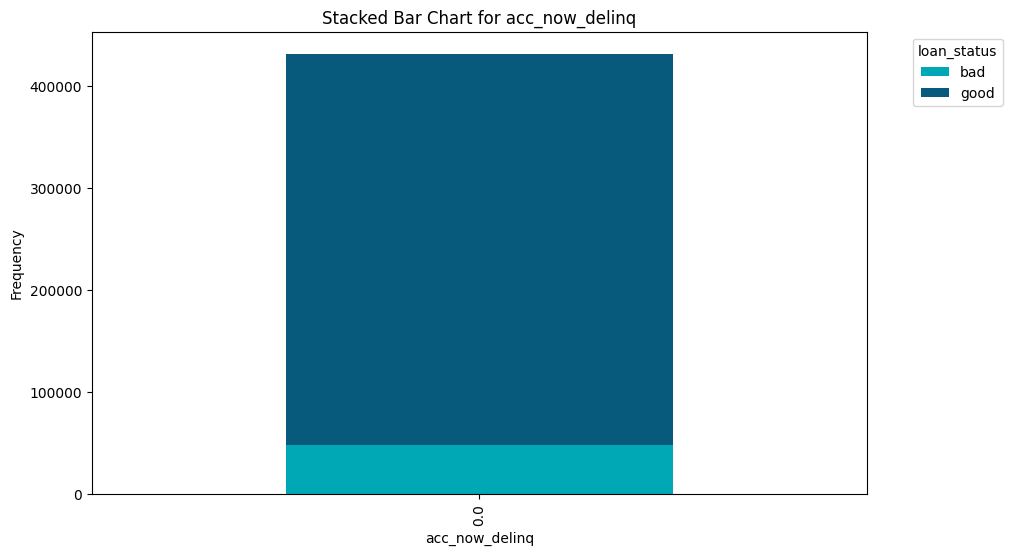

<Figure size 1000x600 with 0 Axes>

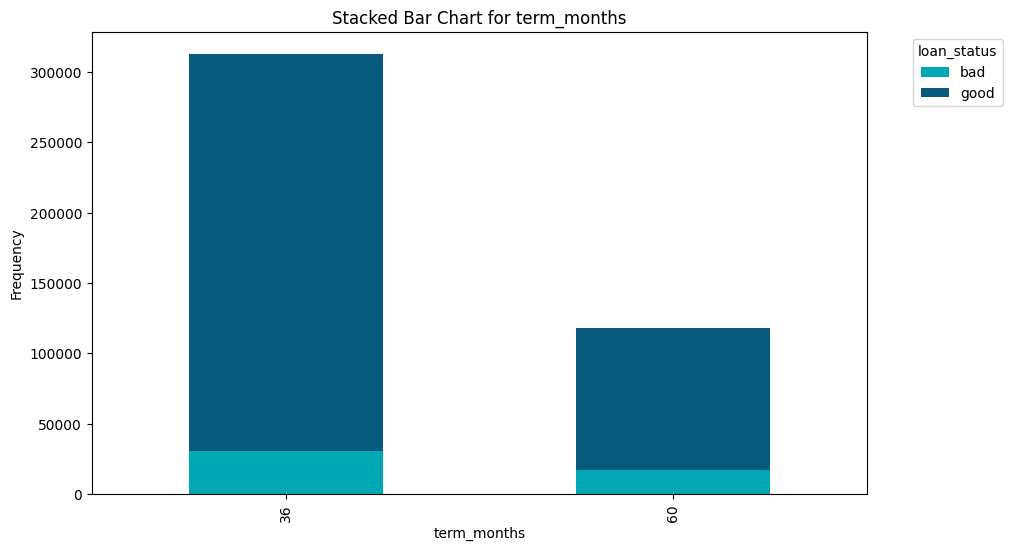

<Figure size 1000x600 with 0 Axes>

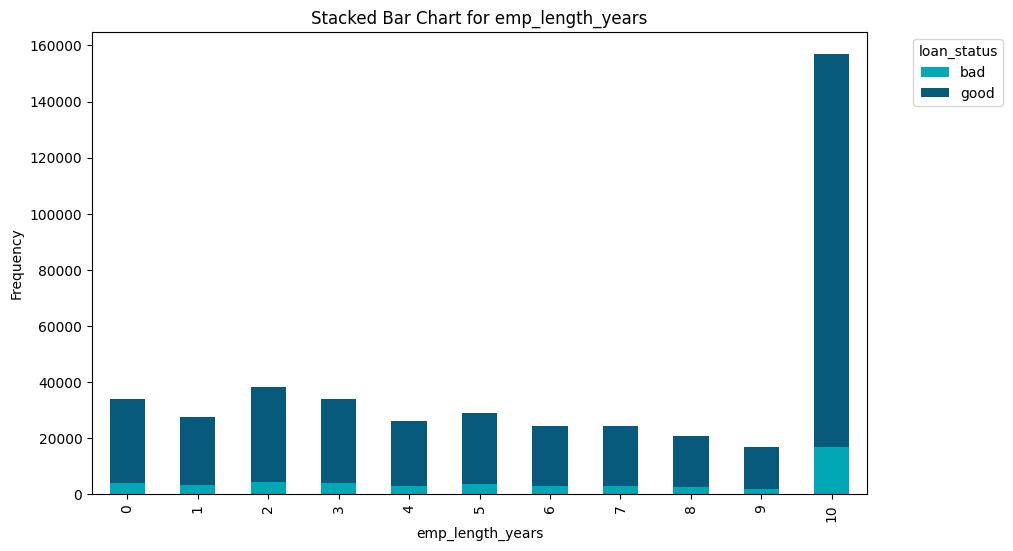

In [31]:
excluded_columns = ['loan_amnt', 'int_rate', 'issue_d', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']

for column in df.columns:
    if column != 'loan_status' and column not in excluded_columns:
        plt.figure(figsize=(10, 6))
        subset_df = df[[column, 'loan_status']]
        subset_df = subset_df[subset_df[column].isin(subset_df[column].value_counts().index)]
        subset_df = pd.crosstab(subset_df[column], subset_df['loan_status'])
        colors = ['#00A8B6', '#085A7D']
        subset_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Stacked Bar Chart for {column}')
        plt.legend(title='loan_status', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()


# Labeling

Mengubah kolom 'mths_since_issue', 'mths_since_last_pymnt', dan 'mths_since_last_credit_pull' dari format date menjadi format numeric agar dapat dilakukan label encoding dengan baik. Caranya adalah dengan menghitung jumlah bulan tertera hingga waktu saat ini.

In [32]:
df['mths_since_issue'] = round(pd.to_numeric((pd.to_datetime('2024-01-01') - df['issue_d']) / np.timedelta64(1, 'M')))
df['mths_since_last_pymnt'] = round(pd.to_numeric((pd.to_datetime('2024-01-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))
df['mths_since_last_credit_pull'] = round(pd.to_numeric((pd.to_datetime('2024-01-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df.drop(['issue_d'], axis=1, inplace=True)
df.drop(['last_pymnt_d'], axis=1, inplace=True)
df.drop(['last_credit_pull_d'], axis=1, inplace=True)
df.head()

,loan_amnt,int_rate,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,term_months,emp_length_years,mths_since_issue,mths_since_last_pymnt,mths_since_last_credit_pull
0,5000,10.65,B,RENT,Verified,good,n,credit_card,AZ,0.0,1.0,3.0,0.0,83.7,9.0,f,0.0,0.0,36,10,145.0,108.0,96.0
2,2400,15.96,C,RENT,Not Verified,good,n,small_business,IL,0.0,2.0,2.0,0.0,98.5,10.0,f,0.0,0.0,36,10,145.0,115.0,96.0
3,10000,13.49,C,RENT,Source Verified,good,n,other,CA,0.0,1.0,10.0,0.0,21.0,37.0,f,0.0,0.0,36,10,145.0,108.0,108.0
4,3000,12.69,B,RENT,Source Verified,good,n,other,OR,0.0,0.0,15.0,0.0,53.9,38.0,f,0.0,0.0,60,1,145.0,96.0,96.0
5,5000,7.90,A,RENT,Source Verified,good,n,wedding,AZ,0.0,3.0,9.0,0.0,28.3,12.0,f,0.0,0.0,36,3,145.0,108.0,100.0


In [33]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded.head()

,loan_amnt,int_rate,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,term_months,emp_length_years,mths_since_issue,mths_since_last_pymnt,mths_since_last_credit_pull
0,5000,10.65,1,5,2,1,0,1,3,0.0,1.0,3.0,0.0,83.7,9.0,0,0.0,0.0,36,10,145.0,108.0,96.0
2,2400,15.96,2,5,0,1,0,11,14,0.0,2.0,2.0,0.0,98.5,10.0,0,0.0,0.0,36,10,145.0,115.0,96.0
3,10000,13.49,2,5,1,1,0,9,4,0.0,1.0,10.0,0.0,21.0,37.0,0,0.0,0.0,36,10,145.0,108.0,108.0
4,3000,12.69,1,5,1,1,0,9,36,0.0,0.0,15.0,0.0,53.9,38.0,0,0.0,0.0,60,1,145.0,96.0,96.0
5,5000,7.90,0,5,1,1,0,13,3,0.0,3.0,9.0,0.0,28.3,12.0,0,0.0,0.0,36,3,145.0,108.0,100.0


In [34]:
# Mengecek tipe data setelah encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431259 entries, 0 to 466284
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    431259 non-null  int64  
 1   int_rate                     431259 non-null  float64
 2   grade                        431259 non-null  int64  
 3   home_ownership               431259 non-null  int64  
 4   verification_status          431259 non-null  int64  
 5   loan_status                  431259 non-null  int64  
 6   pymnt_plan                   431259 non-null  int64  
 7   purpose                      431259 non-null  int64  
 8   addr_state                   431259 non-null  int64  
 9   delinq_2yrs                  431259 non-null  float64
 10  inq_last_6mths               431259 non-null  float64
 11  open_acc                     431259 non-null  float64
 12  pub_rec                      431259 non-null  float64
 13 

# Data Balancing

Sebelum data dipisahkan menjadi train set dan test set hingga digunakan ke dalam model machine learning, data harus diseimbangkan. Data harus diseimbangkan berdasarkan jumlah dari kolom dependen yang menjadi tujuan, yaitu kolom ‘loan_status’. Penyeimbangan dilakukan dengan menggunakan instance dari RandomOverSampler() milik library imblearn, dengan memasukkan dataframe feature dan label sebagai input untuk dilakukan penyeimbangan.

In [49]:
df_encoded['loan_status'].value_counts()

1    383259
0     48000
Name: loan_status, dtype: int64

Ketika jumlah value dicek, didapatkan fakta bahwa value '1' yang merepresentasikan ‘good’ memiliki jumlah 383259 yang mana jauh lebih banyak daripada value '0' yang merepresentasikan nilai ‘bad’. Oleh karena itu, value harus diseimbangkan sehingga jumlahnya sama menjadi 383259


In [35]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

balanced = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balanced.fit_resample(X, y)
y_balanced.value_counts()

1    383259
0    383259
Name: loan_status, dtype: int64


Hasilnya, didapatkan data feature dan label yang telah diseimbangkan, sehingga sekarang value ‘bad’ (0) dan ‘good’ (1) telah seimbang menjadi 383259 baris data.


# Data Splitting

Sebelum dimasukkan ke dalam model klasifikasi, data harus dipisahkan/dipotong menjadi train set dan test set. Ada 4 dataset yang akan dihasilkan, yaitu X_train dan y_train, serta X_test dan y_test. Pemisahan dilakukan dengan menggunakan test_size = 30%, yaitu 30% dari data akan dialokasikan ke dataset uji (X_test dan y_test), sedangkan 70% sisanya akan digunakan sebagai dataset pelatihan (X_train dan y_train). Data pelatihan (X_train dan y_train) akan digunakan untuk melatih model, dan data uji (X_test dan y_test) akan digunakan untuk menguji kinerja model tersebut.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

# Feature Scalling

Feature scaling digunakan untuk menyamakan skala pada data numerik di dataset agar nilainya tidak terlalu jauh dibandingkan data lainnya. Kolom apa saja yang perlu dilakukan feature scaling dapat dievaluasi dari nilai persebaran nilainya.


In [55]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
X_train

array([[-0.38073   ,  1.08007214,  0.69088489, ..., -0.60772213,
        -0.77526127, -0.51701154],
       [-0.35365755, -0.15620057, -0.03978958, ..., -0.33616226,
         0.13384478, -0.51701154],
       [ 0.42843533, -0.00757762, -0.03978958, ..., -0.60772213,
        -0.07594893,  0.02729628],
       ...,
       [ 0.35925019, -1.30014691, -1.50113852, ...,  0.20695747,
        -0.84519251, -0.51701154],
       [-0.29349656, -0.07738537, -0.03978958, ...,  0.27484744,
         0.20377601, -0.51701154],
       [-0.53414052, -0.57504707, -0.77046405, ...,  0.1390675 ,
         0.41356972,  0.843758  ]])

In [58]:
X_test

array([[-0.08894919, -0.57504707, -0.77046405, ...,  0.68218724,
        -0.56546757, -0.51701154],
       [ 1.15036723, -0.379135  , -0.03978958, ..., -1.01506193,
        -0.07594893, -0.51701154],
       [-0.19723897,  0.25363847, -0.03978958, ...,  0.07117754,
         0.48350095,  0.75304003],
       ...,
       [ 0.6690793 , -0.29806793, -0.03978958, ..., -0.94717196,
        -0.84519251, -0.51701154],
       [-1.09062969,  0.69725546,  0.69088489, ...,  0.3427374 ,
         1.25274453,  1.7509377 ],
       [ 0.78940128,  0.95621969,  0.69088489, ..., -0.6756121 ,
        -0.84519251, -0.51701154]])

# Classification Model

## Logistic Regression

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred_logreg))

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72    114978
           1       0.71      0.75      0.73    114978

    accuracy                           0.73    229956
   macro avg       0.73      0.73      0.73    229956
weighted avg       0.73      0.73      0.73    229956



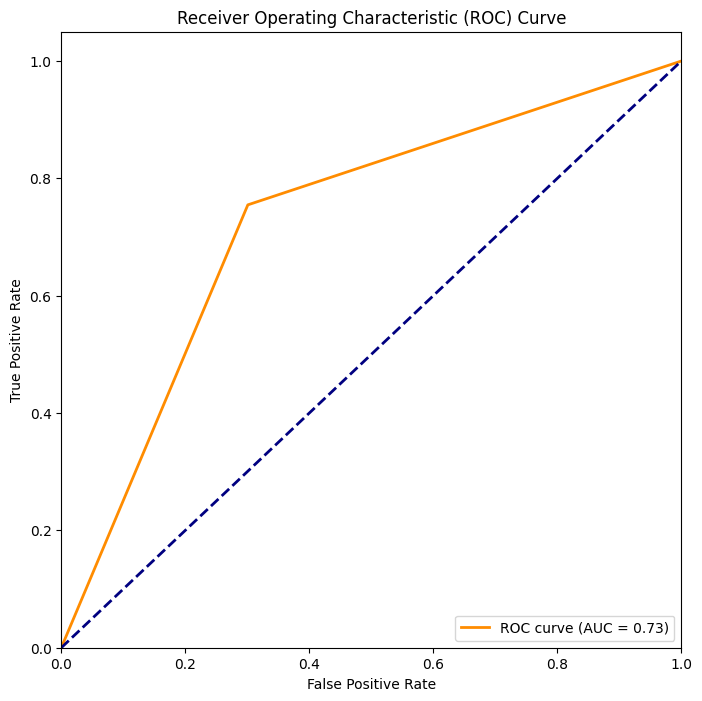

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_logreg)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Neural Network

In [40]:
nn =  MLPClassifier(alpha=1, max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred_nn))

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80    114978
           1       0.81      0.78      0.79    114978

    accuracy                           0.80    229956
   macro avg       0.80      0.80      0.80    229956
weighted avg       0.80      0.80      0.80    229956



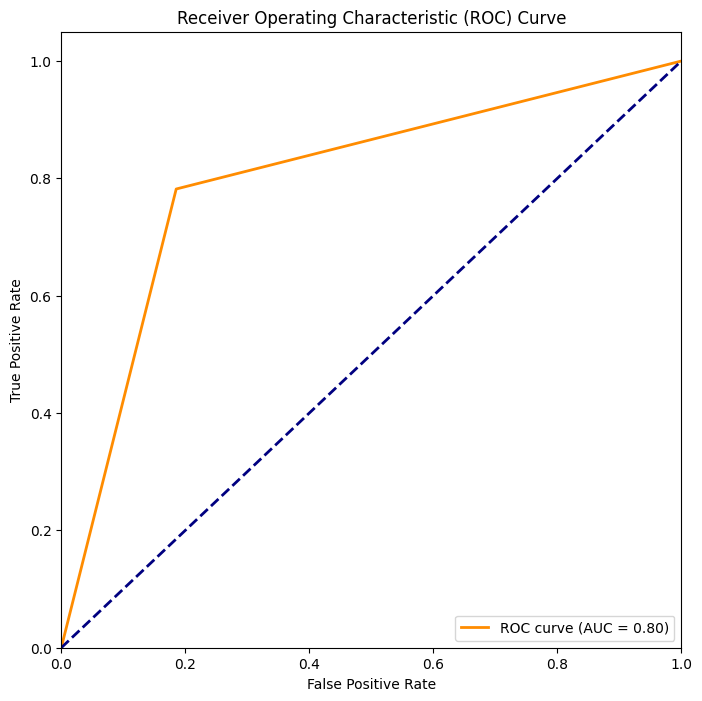

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn)
roc_auc = roc_auc_score(y_test, y_pred_nn)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [42]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred_dtree))

Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    114978
           1       1.00      0.92      0.96    114978

    accuracy                           0.96    229956
   macro avg       0.96      0.96      0.96    229956
weighted avg       0.96      0.96      0.96    229956



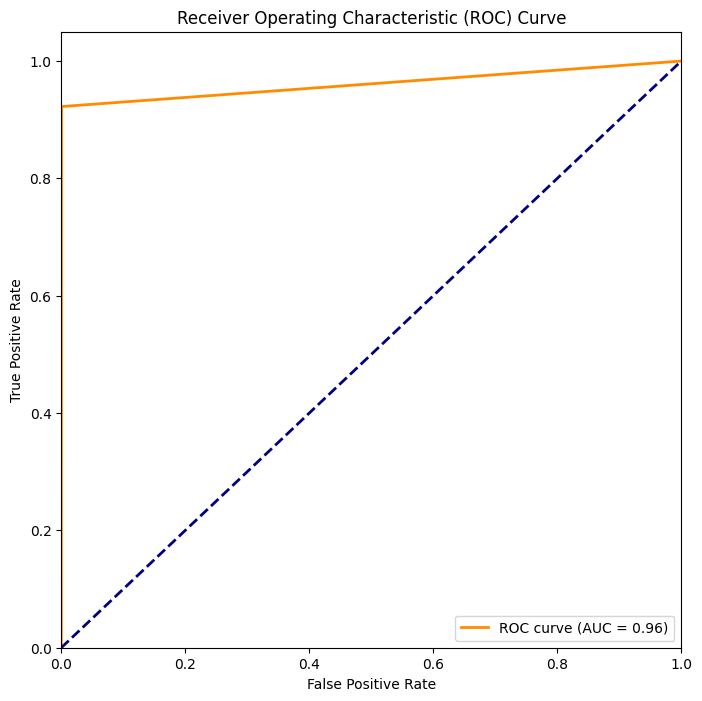

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtree)
roc_auc = roc_auc_score(y_test, y_pred_dtree)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred_rf))

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    114978
           1       1.00      0.95      0.97    114978

    accuracy                           0.97    229956
   macro avg       0.97      0.97      0.97    229956
weighted avg       0.97      0.97      0.97    229956



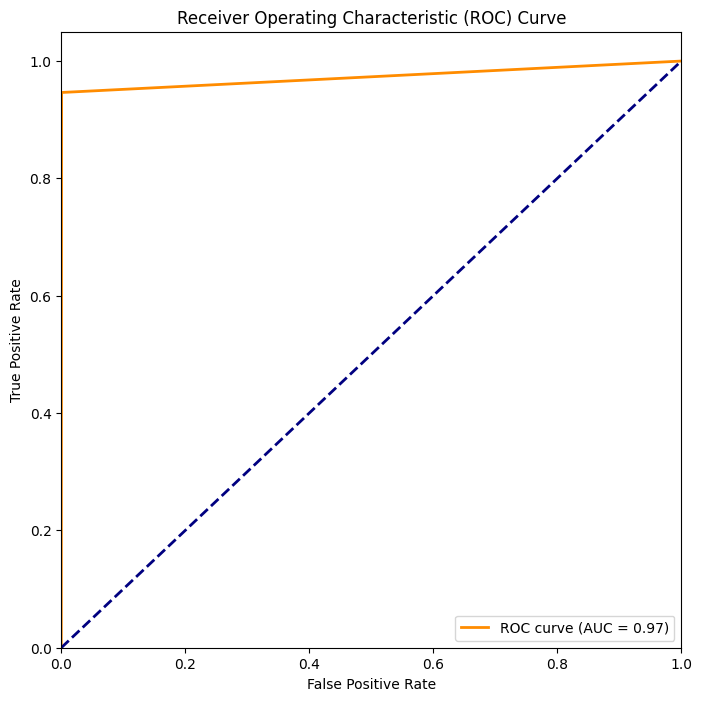

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## K-Nearest Neighbors

In [46]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred_knn))

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90    114978
           1       0.99      0.79      0.88    114978

    accuracy                           0.89    229956
   macro avg       0.91      0.89      0.89    229956
weighted avg       0.91      0.89      0.89    229956



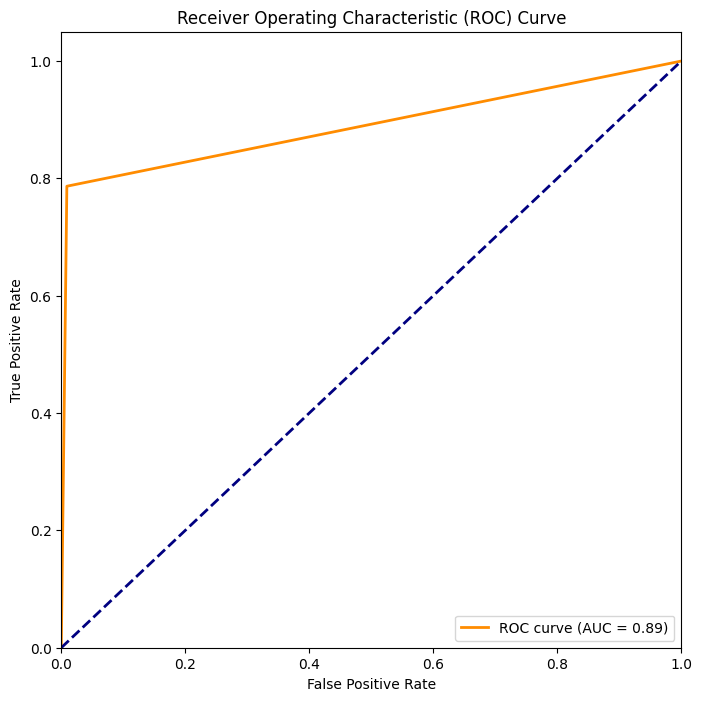

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion

Dari 5 model klasifikasi di atas, model dengan performa terbaik untuk melakukan prediksi terhadap credit risk adalah Random Forest dengan f1-score=0,97 dan score ROC-AUC=0,97